# Benchmark - Rollout Accuracy

This notebook allows you to reproduce the rollout accuracy showcased for the GNS.

**Note**: It takes a considerable amount of time to run these tests

**Requirements**: Download Datasets + Pre-trained Models

In [1]:
import os
import jax
import sys
import glob
import yaml
import pickle
import numpy as np
import jax.numpy as jnp
from pathlib import Path

# uncomment the line below for nicer plots (needs LaTeX)
# os.environ['MATPLOTLIBRC'] = '../matplotlibrc'
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

sys.path.append('../..')
from gns.simulator import SMGNS
from gns.utils import get_dx_eq, get_x_eq, get_E, get_stats
from gns.tests import plot_trajectory_comparison, rollout_error_crossings
from gns.preprocess import init_XV_crossings

## dont let JAX preallocate all GPU memory + free unused arrays 
## https://jax.readthedocs.io/en/latest/gpu_memory_allocation.html
## makes code slower
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false" 
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
# need higher precision to compare rollout errors for dt=1e-2 and larger number of sheets
jax.config.update("jax_enable_x64", True)

../../models/final/dt1e-1/4
Boudary: reflecting 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0008  std: 0.0010  best: 0.0001 (72)  worst: 0.0091 (7)
[1/dx]	 n_sheets: 2  avg: 0.0017  std: 0.0020  best: 0.0001 (72)  worst: 0.0182 (7)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0008  std: 0.0010  best: 0.0001 (72)  worst: 0.0091 (7)
[1/dx]	 n_sheets: 2  avg: 0.0017  std: 0.0020  best: 0.0001 (72)  worst: 0.0182 (7)


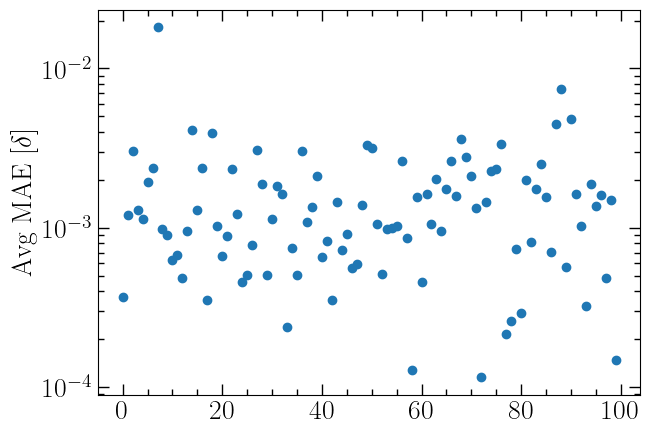

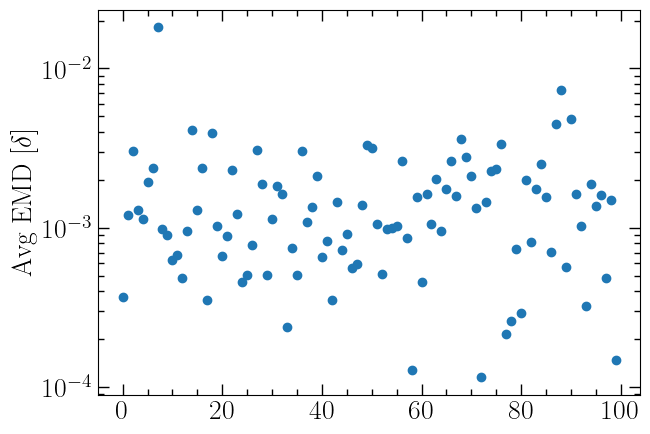

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0009  std: 0.0050  best: 0.0001 (71)  worst: 0.0487 (59)
[1/dx]	 n_sheets: 10  avg: 0.0088  std: 0.0497  best: 0.0006 (71)  worst: 0.4869 (59)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0003  std: 0.0003  best: 0.0001 (71)  worst: 0.0024 (26)
[1/dx]	 n_sheets: 10  avg: 0.0029  std: 0.0030  best: 0.0006 (71)  worst: 0.0240 (26)


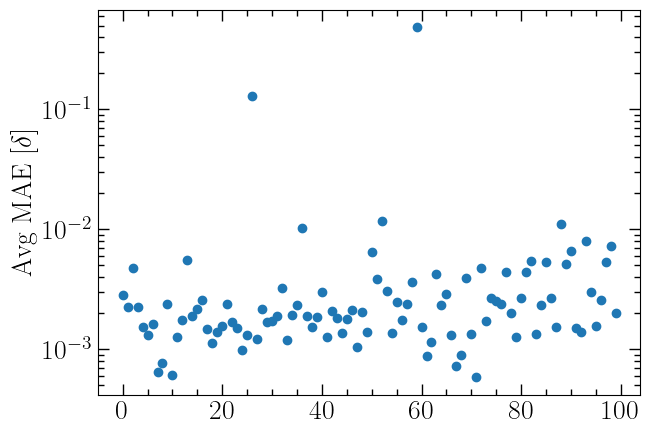

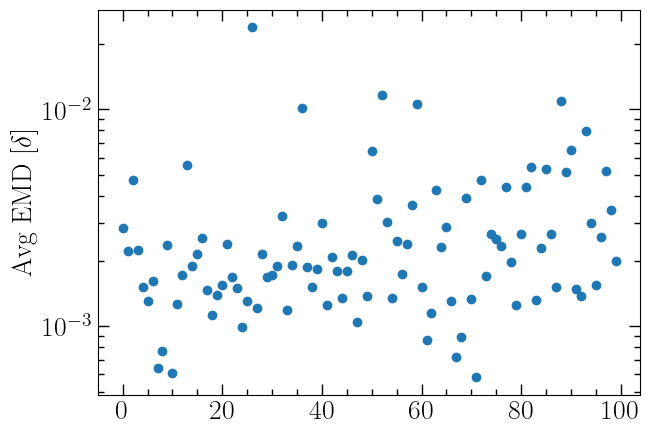

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]

2023-12-29 17:06:01.498551: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  slice.10 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2023-12-29 17:06:01.499258: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 2.702313973s
Constant folding an instruction is taking > 1s:

  slice.10 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't nec



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (9)  worst: 0.0003 (60)
[1/dx]	 n_sheets: 100  avg: 0.0037  std: 0.0048  best: 0.0014 (9)  worst: 0.0296 (60)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (72)  worst: 0.0001 (69)
[1/dx]	 n_sheets: 100  avg: 0.0025  std: 0.0010  best: 0.0014 (72)  worst: 0.0064 (69)


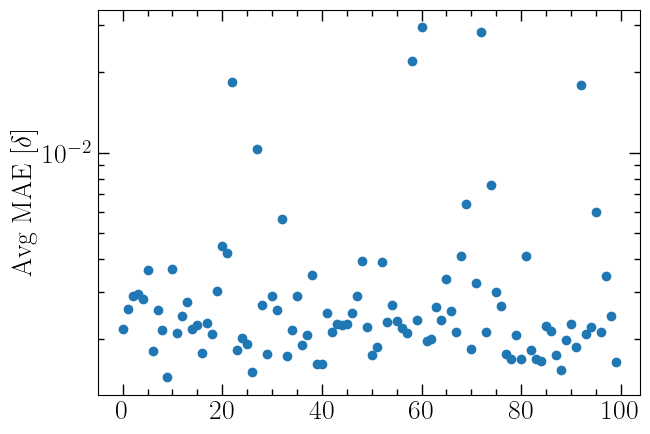

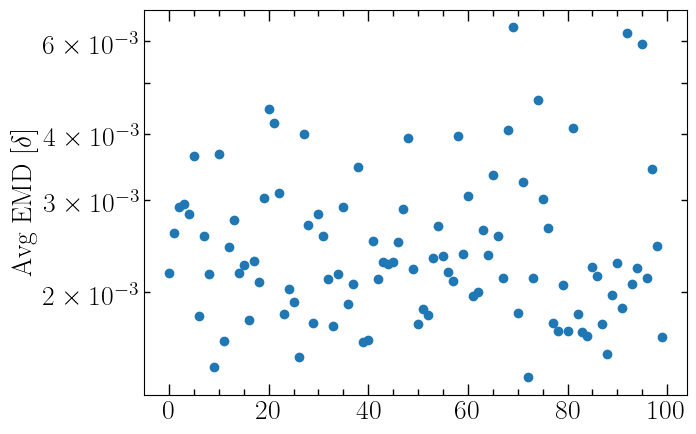

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (64)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0062  std: 0.0069  best: 0.0019 (64)  worst: 0.0378 (84)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (91)  worst: 0.0000 (65)
[1/dx]	 n_sheets: 1000  avg: 0.0025  std: 0.0004  best: 0.0019 (91)  worst: 0.0039 (65)


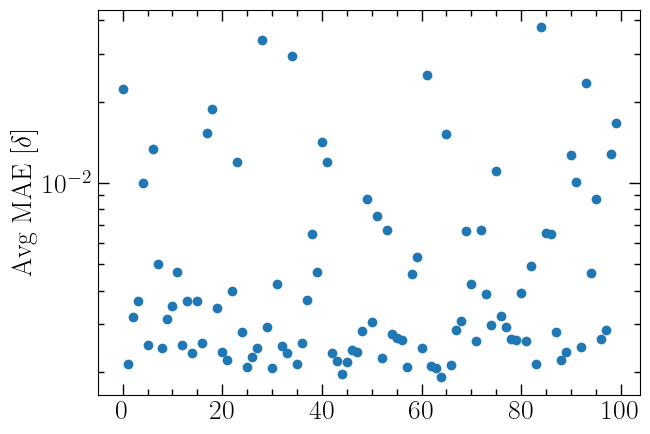

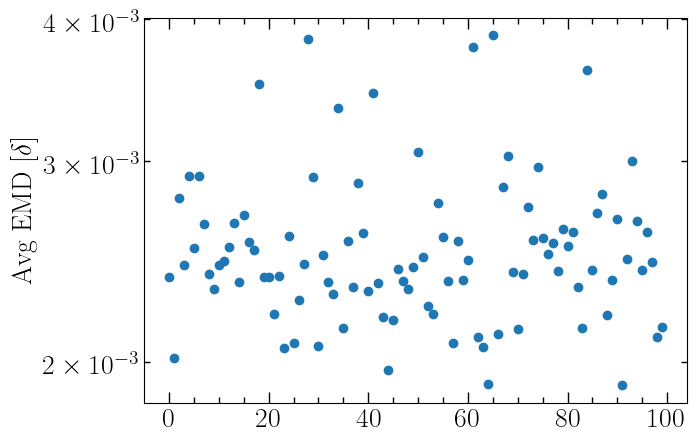

Boudary: periodic 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0004  std: 0.0003  best: 0.0000 (35)  worst: 0.0017 (83)
[1/dx]	 n_sheets: 2  avg: 0.0008  std: 0.0006  best: 0.0001 (35)  worst: 0.0034 (83)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0004  std: 0.0003  best: 0.0000 (35)  worst: 0.0017 (83)
[1/dx]	 n_sheets: 2  avg: 0.0008  std: 0.0006  best: 0.0001 (35)  worst: 0.0034 (83)


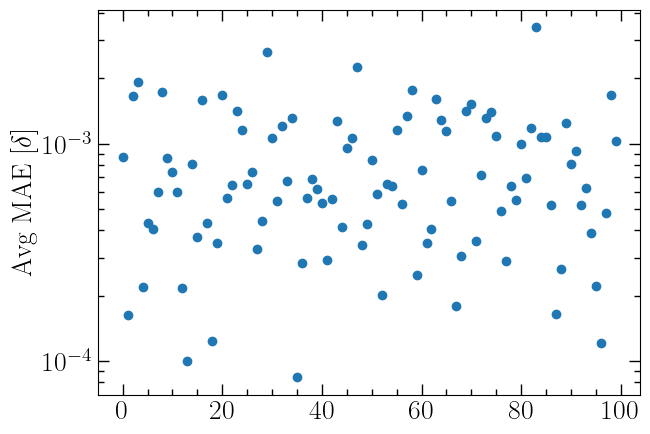

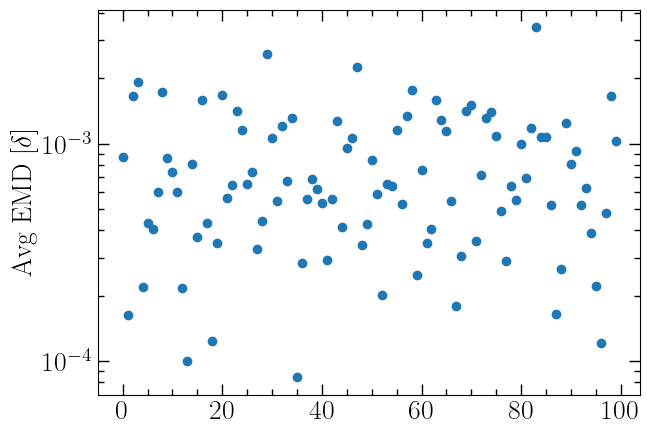

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0000 (50)  worst: 0.0007 (43)
[1/dx]	 n_sheets: 10  avg: 0.0017  std: 0.0011  best: 0.0004 (50)  worst: 0.0068 (43)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0000 (50)  worst: 0.0007 (43)
[1/dx]	 n_sheets: 10  avg: 0.0017  std: 0.0011  best: 0.0004 (50)  worst: 0.0067 (43)


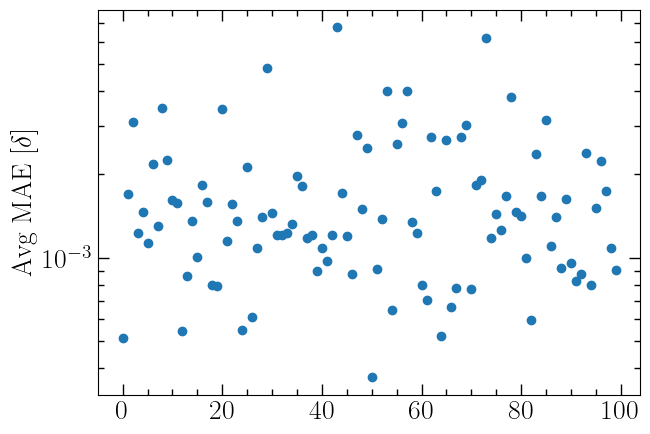

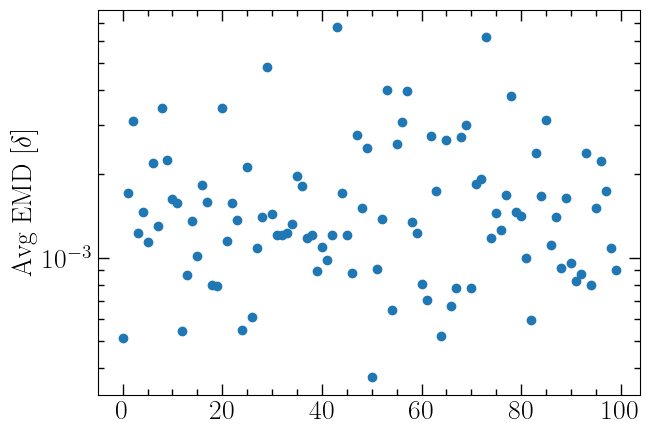

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0001  best: 0.0000 (78)  worst: 0.0009 (93)
[1/dx]	 n_sheets: 100  avg: 0.0049  std: 0.0114  best: 0.0011 (78)  worst: 0.0854 (93)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (78)  worst: 0.0001 (93)
[1/dx]	 n_sheets: 100  avg: 0.0024  std: 0.0008  best: 0.0011 (78)  worst: 0.0059 (93)


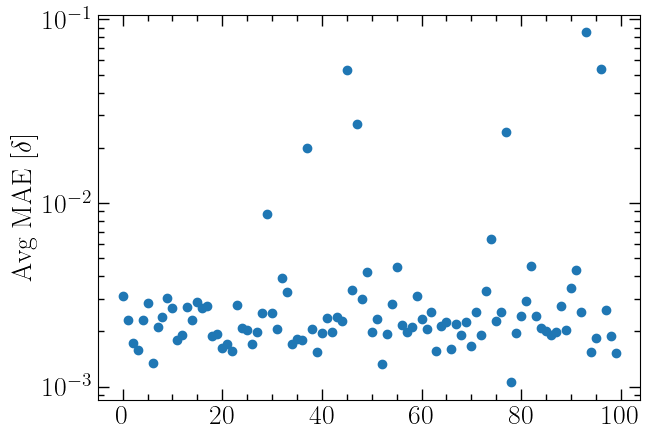

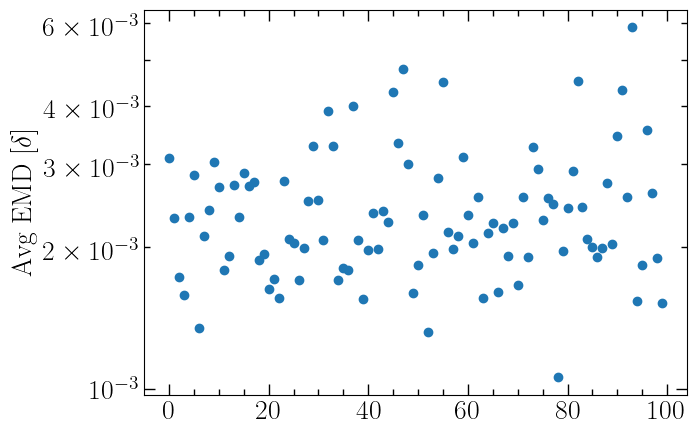

Boudary: periodic 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (60)  worst: 0.0000 (74)
[1/dx]	 n_sheets: 1000  avg: 0.0047  std: 0.0042  best: 0.0020 (60)  worst: 0.0239 (74)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (60)  worst: 0.0000 (65)
[1/dx]	 n_sheets: 1000  avg: 0.0025  std: 0.0003  best: 0.0020 (60)  worst: 0.0038 (65)


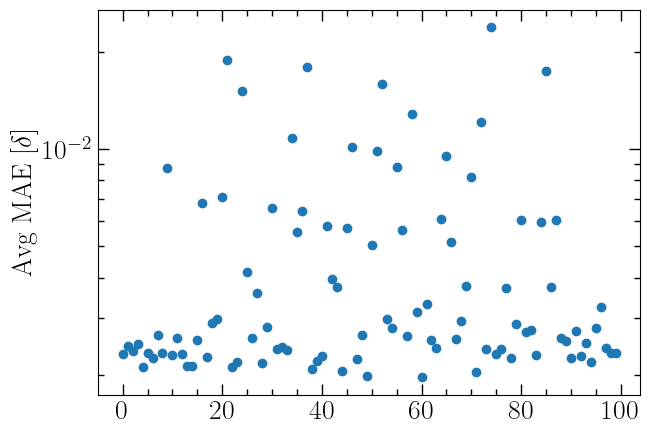

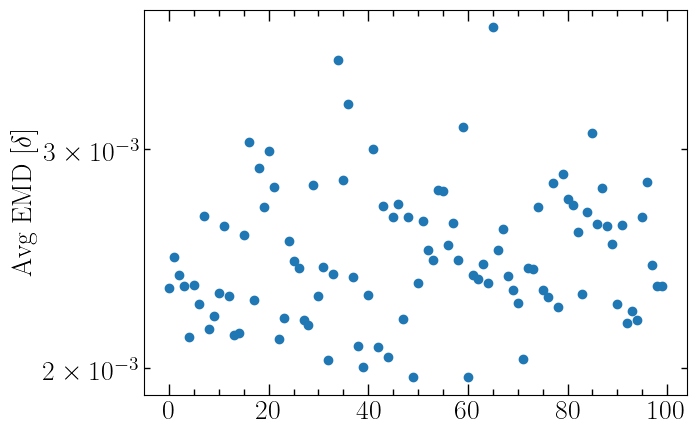

../../models/final/dt1e-1/2
Boudary: reflecting 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0011  std: 0.0007  best: 0.0001 (99)  worst: 0.0038 (12)
[1/dx]	 n_sheets: 2  avg: 0.0022  std: 0.0015  best: 0.0003 (99)  worst: 0.0076 (12)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0011  std: 0.0007  best: 0.0001 (99)  worst: 0.0038 (12)
[1/dx]	 n_sheets: 2  avg: 0.0022  std: 0.0015  best: 0.0003 (99)  worst: 0.0076 (12)


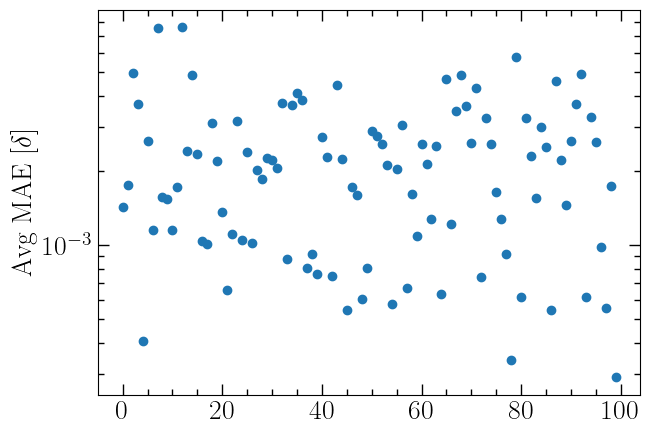

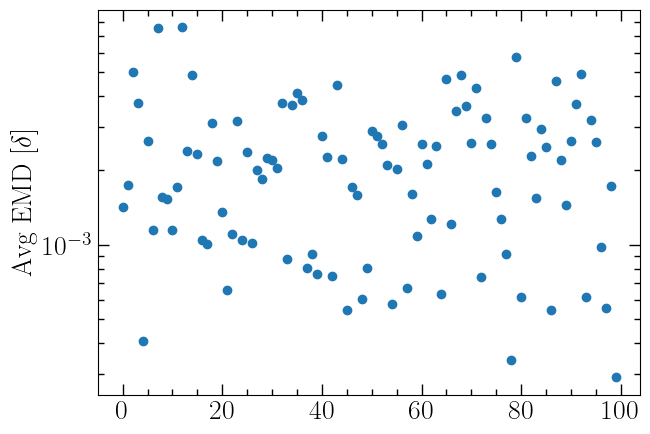

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0004  std: 0.0012  best: 0.0001 (61)  worst: 0.0127 (26)
[1/dx]	 n_sheets: 10  avg: 0.0042  std: 0.0124  best: 0.0008 (61)  worst: 0.1265 (26)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0003  std: 0.0002  best: 0.0001 (61)  worst: 0.0021 (26)
[1/dx]	 n_sheets: 10  avg: 0.0031  std: 0.0025  best: 0.0008 (61)  worst: 0.0214 (26)


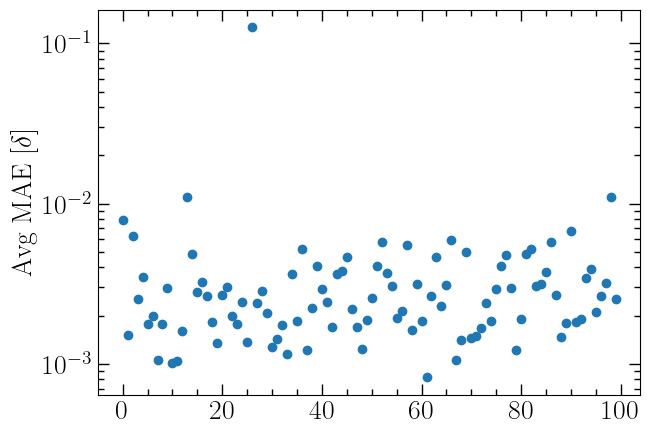

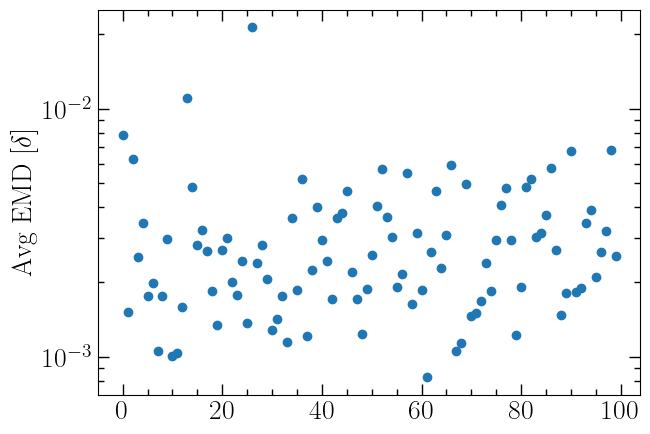

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0001  std: 0.0001  best: 0.0000 (52)  worst: 0.0011 (4)
[1/dx]	 n_sheets: 100  avg: 0.0056  std: 0.0132  best: 0.0014 (52)  worst: 0.1100 (4)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (52)  worst: 0.0001 (95)
[1/dx]	 n_sheets: 100  avg: 0.0031  std: 0.0011  best: 0.0014 (52)  worst: 0.0082 (95)


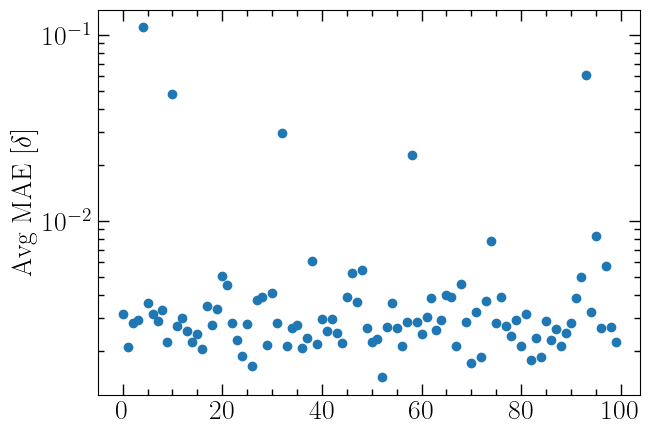

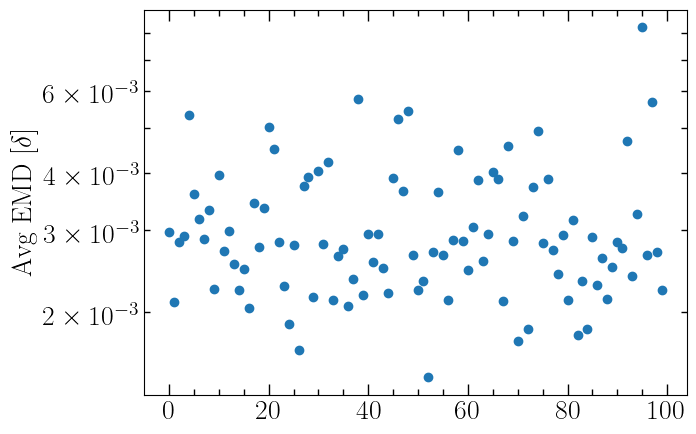

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (64)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0061  std: 0.0060  best: 0.0023 (64)  worst: 0.0377 (84)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (64)  worst: 0.0000 (65)
[1/dx]	 n_sheets: 1000  avg: 0.0030  std: 0.0005  best: 0.0023 (64)  worst: 0.0048 (65)


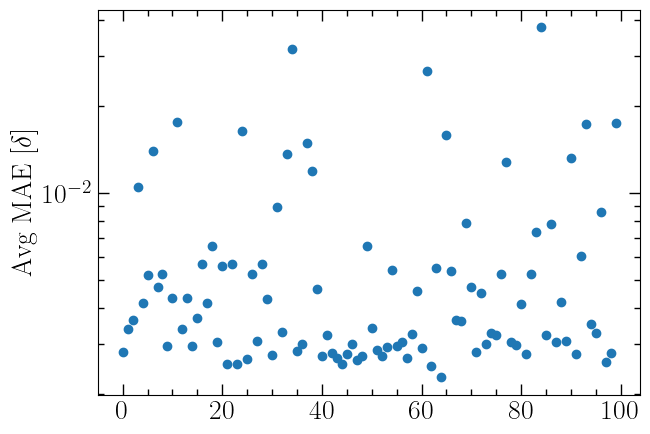

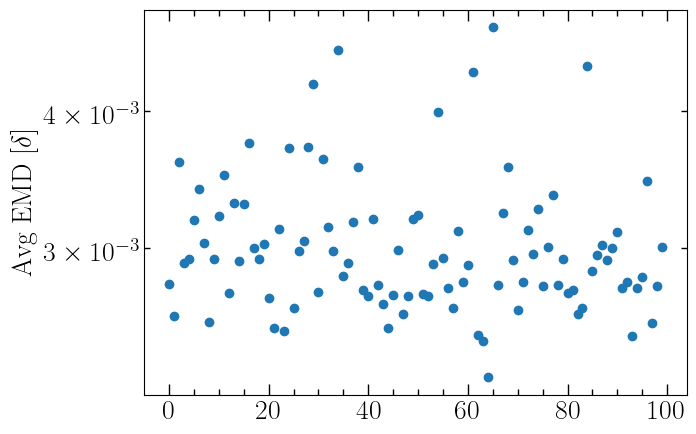

Boudary: periodic 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0008  std: 0.0004  best: 0.0001 (12)  worst: 0.0020 (93)
[1/dx]	 n_sheets: 2  avg: 0.0017  std: 0.0008  best: 0.0001 (12)  worst: 0.0041 (93)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0008  std: 0.0004  best: 0.0001 (12)  worst: 0.0020 (93)
[1/dx]	 n_sheets: 2  avg: 0.0017  std: 0.0008  best: 0.0001 (12)  worst: 0.0040 (93)


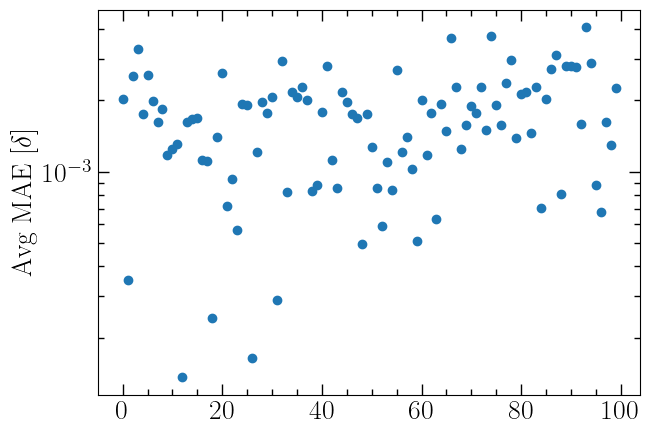

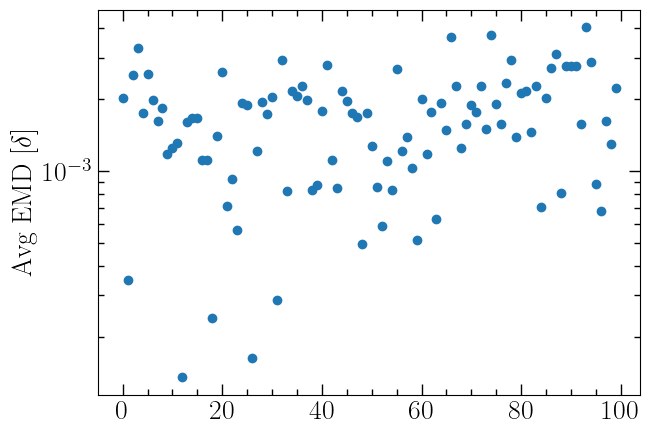

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]

2023-12-29 17:46:26.088401: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 2s:

  slice (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2023-12-29 17:46:26.088666: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 1m53.435123518s
Constant folding an instruction is taking > 2s:

  slice (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necess



[1/L]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0001 (42)  worst: 0.0005 (35)
[1/dx]	 n_sheets: 10  avg: 0.0020  std: 0.0009  best: 0.0007 (42)  worst: 0.0051 (35)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0001 (42)  worst: 0.0005 (35)
[1/dx]	 n_sheets: 10  avg: 0.0020  std: 0.0009  best: 0.0007 (42)  worst: 0.0051 (35)


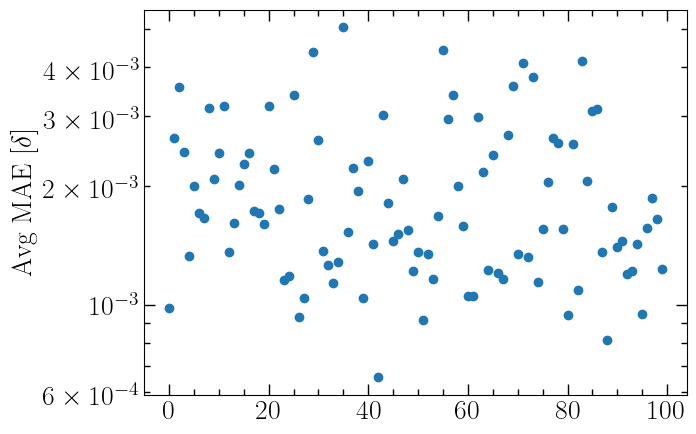

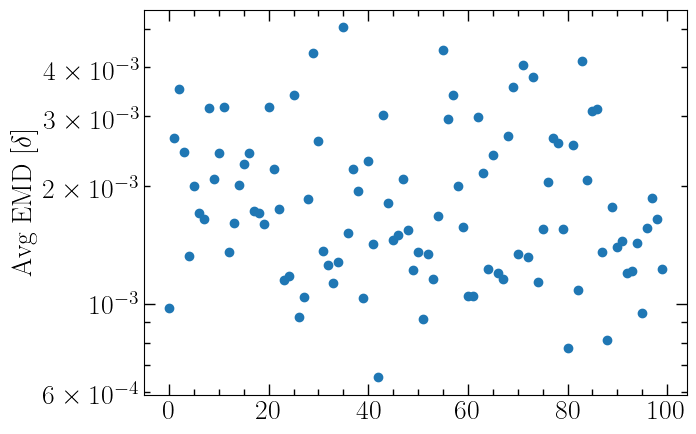

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]

2023-12-29 17:48:16.853473: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 4s:

  slice (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2023-12-29 17:48:16.854069: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 1m50.219315594s
Constant folding an instruction is taking > 4s:

  slice (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necess



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (38)  worst: 0.0000 (67)
[1/dx]	 n_sheets: 1000  avg: 0.0053  std: 0.0040  best: 0.0023 (38)  worst: 0.0248 (67)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (38)  worst: 0.0000 (36)
[1/dx]	 n_sheets: 1000  avg: 0.0030  std: 0.0004  best: 0.0023 (38)  worst: 0.0041 (36)


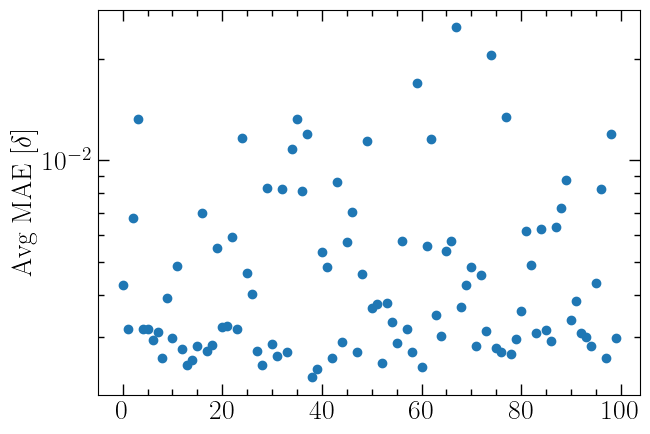

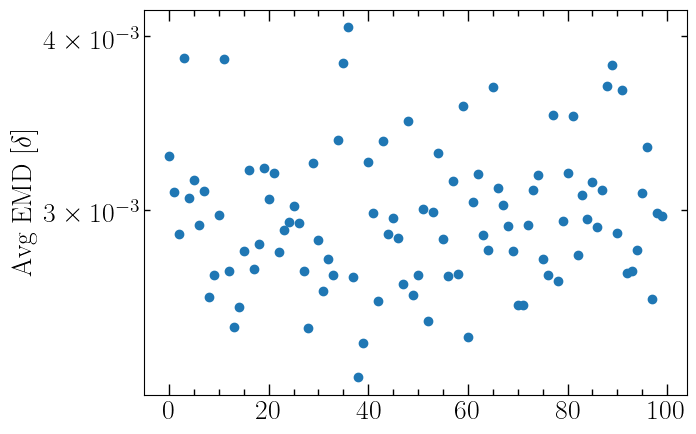

../../models/final/dt1e-1/0
Boudary: reflecting 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]

2023-12-29 17:57:05.351934: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 8s:

  slice.5 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2023-12-29 17:57:05.352441: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 6m39.663690098s
Constant folding an instruction is taking > 8s:

  slice.5 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't ne



[1/L]	 n_sheets: 2  avg: 0.0010  std: 0.0008  best: 0.0001 (41)  worst: 0.0055 (14)
[1/dx]	 n_sheets: 2  avg: 0.0020  std: 0.0016  best: 0.0003 (41)  worst: 0.0111 (14)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0010  std: 0.0008  best: 0.0001 (41)  worst: 0.0055 (14)
[1/dx]	 n_sheets: 2  avg: 0.0020  std: 0.0016  best: 0.0003 (41)  worst: 0.0111 (14)


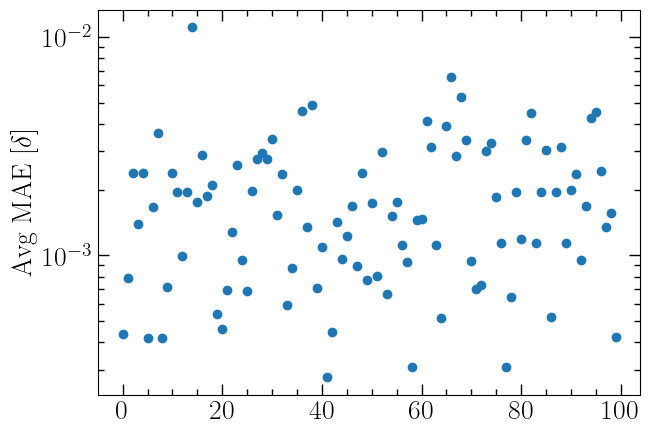

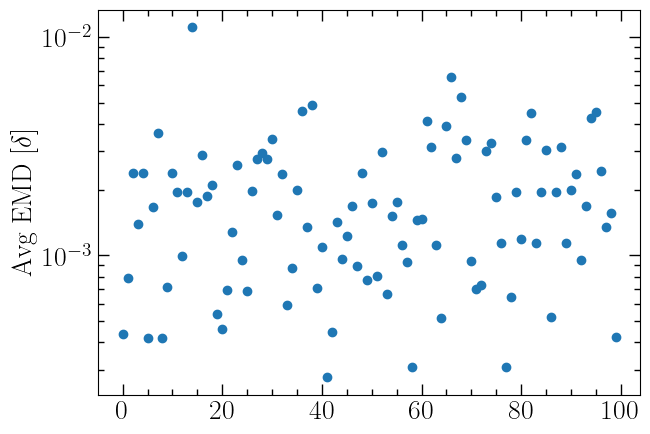

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0007  std: 0.0048  best: 0.0001 (68)  worst: 0.0482 (59)
[1/dx]	 n_sheets: 10  avg: 0.0074  std: 0.0478  best: 0.0006 (68)  worst: 0.4821 (59)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0003  std: 0.0002  best: 0.0001 (68)  worst: 0.0015 (36)
[1/dx]	 n_sheets: 10  avg: 0.0026  std: 0.0022  best: 0.0006 (68)  worst: 0.0154 (36)


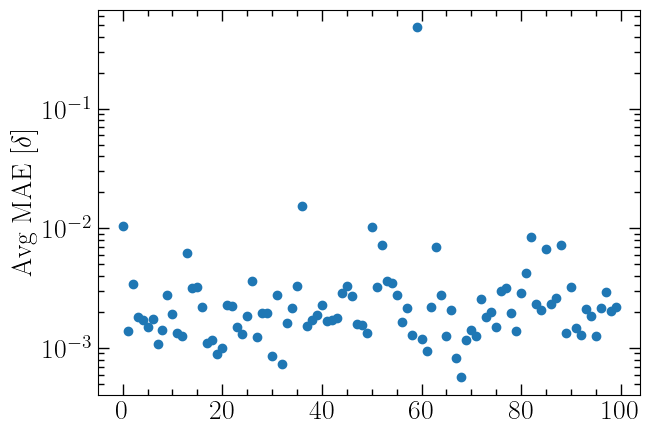

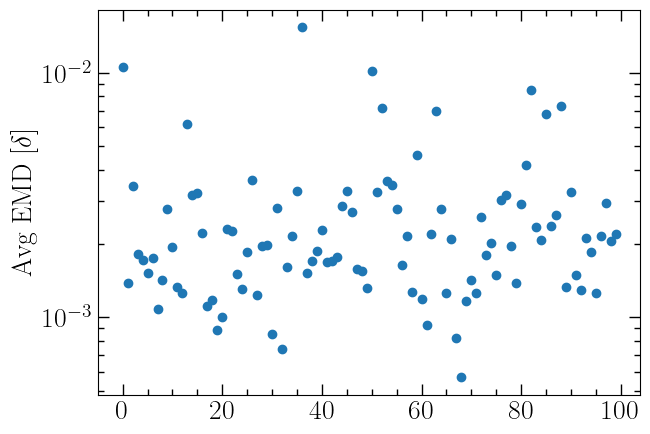

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0001  best: 0.0000 (36)  worst: 0.0005 (9)
[1/dx]	 n_sheets: 100  avg: 0.0036  std: 0.0058  best: 0.0016 (36)  worst: 0.0513 (9)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (52)  worst: 0.0001 (10)
[1/dx]	 n_sheets: 100  avg: 0.0025  std: 0.0008  best: 0.0013 (52)  worst: 0.0056 (10)


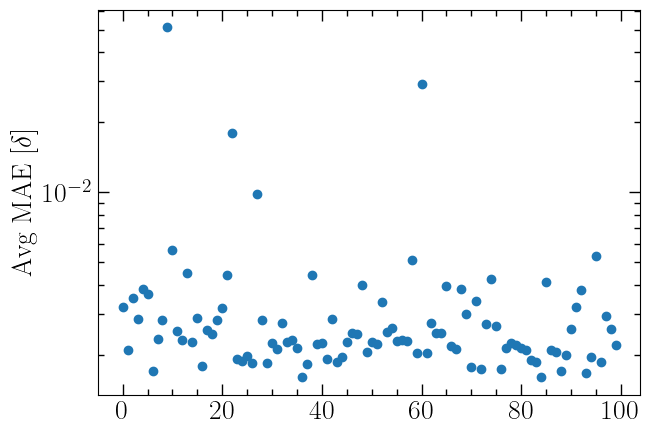

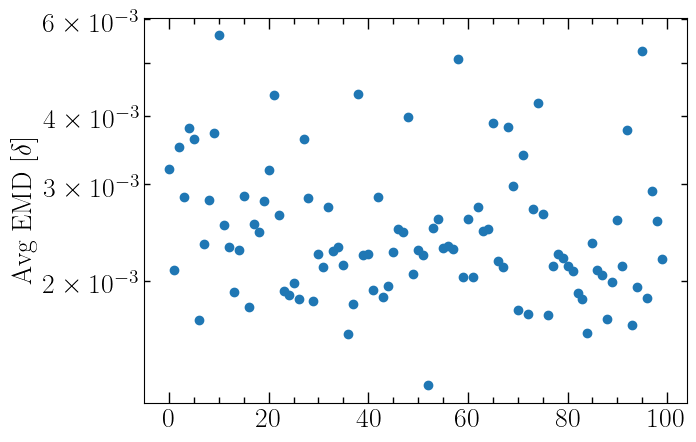

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (44)  worst: 0.0000 (34)
[1/dx]	 n_sheets: 1000  avg: 0.0056  std: 0.0056  best: 0.0019 (44)  worst: 0.0298 (34)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (44)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0026  std: 0.0004  best: 0.0019 (44)  worst: 0.0039 (84)


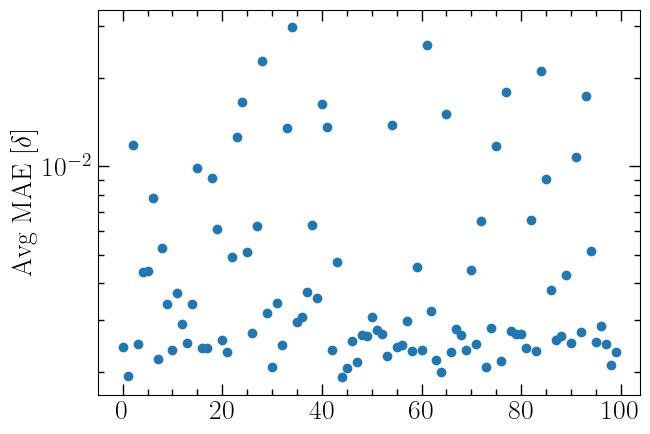

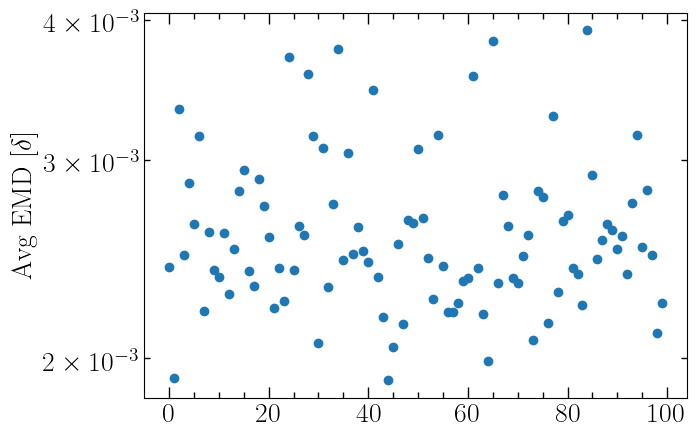

Boudary: periodic 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0005  std: 0.0003  best: 0.0001 (62)  worst: 0.0013 (87)
[1/dx]	 n_sheets: 2  avg: 0.0009  std: 0.0006  best: 0.0001 (62)  worst: 0.0027 (87)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0005  std: 0.0003  best: 0.0001 (62)  worst: 0.0013 (87)
[1/dx]	 n_sheets: 2  avg: 0.0009  std: 0.0006  best: 0.0001 (62)  worst: 0.0027 (87)


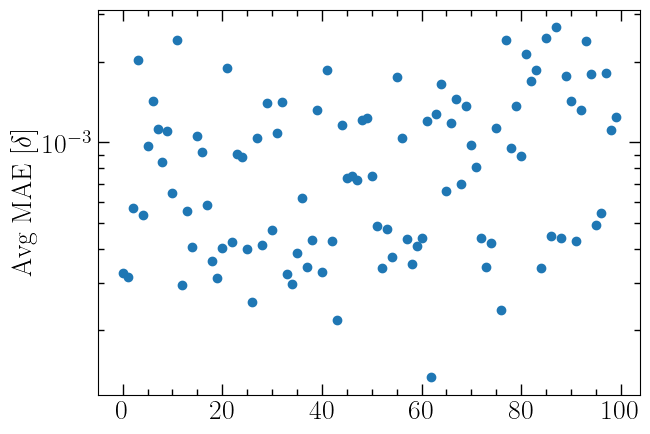

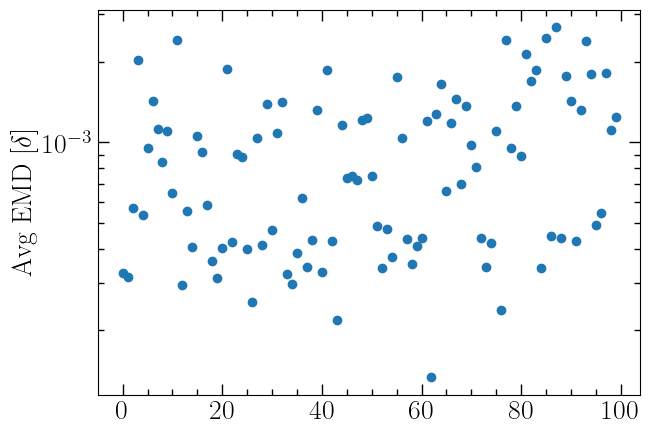

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0000 (50)  worst: 0.0006 (55)
[1/dx]	 n_sheets: 10  avg: 0.0018  std: 0.0009  best: 0.0004 (50)  worst: 0.0059 (55)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0000 (50)  worst: 0.0006 (55)
[1/dx]	 n_sheets: 10  avg: 0.0018  std: 0.0009  best: 0.0004 (50)  worst: 0.0059 (55)


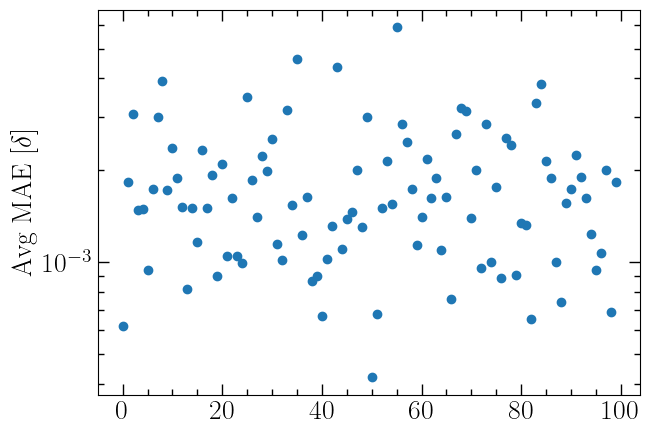

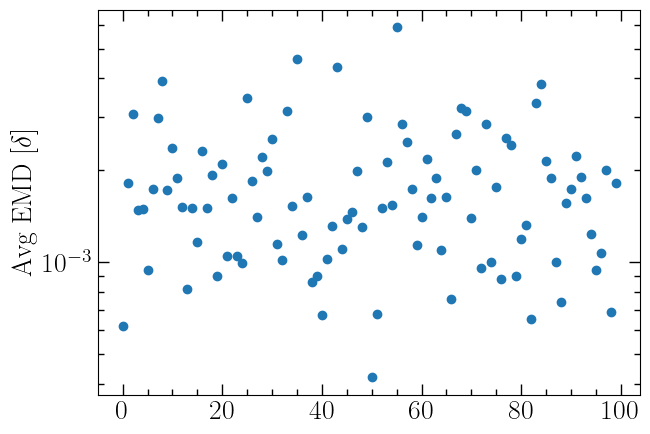

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0001  std: 0.0001  best: 0.0000 (94)  worst: 0.0008 (92)
[1/dx]	 n_sheets: 100  avg: 0.0050  std: 0.0107  best: 0.0015 (94)  worst: 0.0818 (92)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (94)  worst: 0.0001 (44)
[1/dx]	 n_sheets: 100  avg: 0.0025  std: 0.0008  best: 0.0015 (94)  worst: 0.0069 (44)


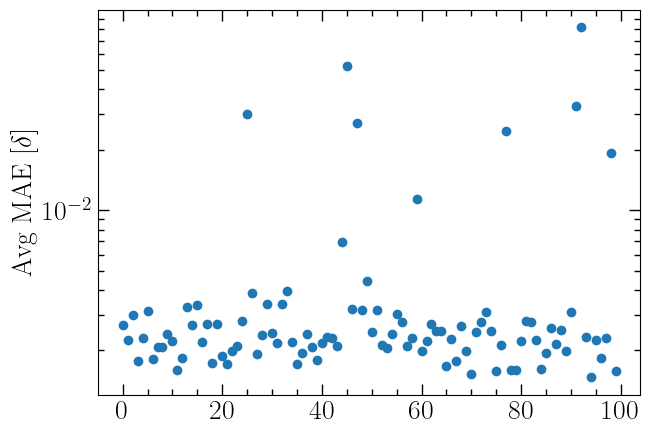

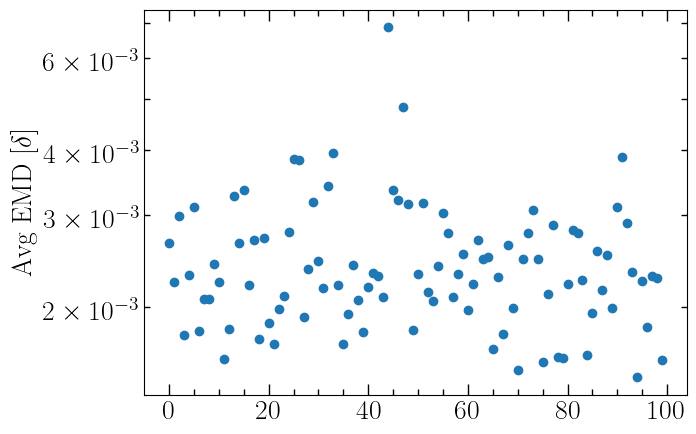

Boudary: periodic 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (38)  worst: 0.0000 (89)
[1/dx]	 n_sheets: 1000  avg: 0.0041  std: 0.0033  best: 0.0020 (38)  worst: 0.0240 (89)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (38)  worst: 0.0000 (81)
[1/dx]	 n_sheets: 1000  avg: 0.0025  std: 0.0003  best: 0.0020 (38)  worst: 0.0035 (81)


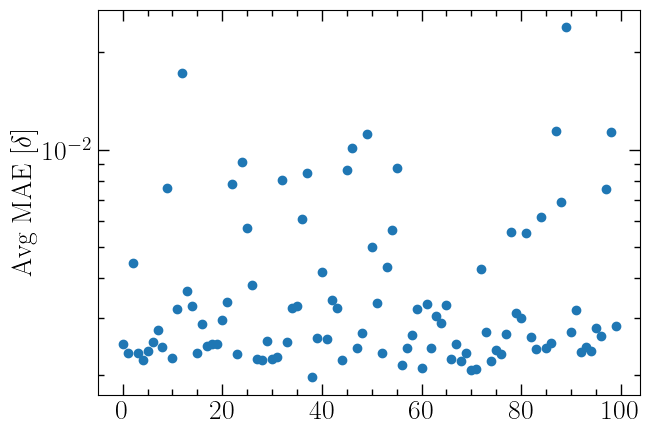

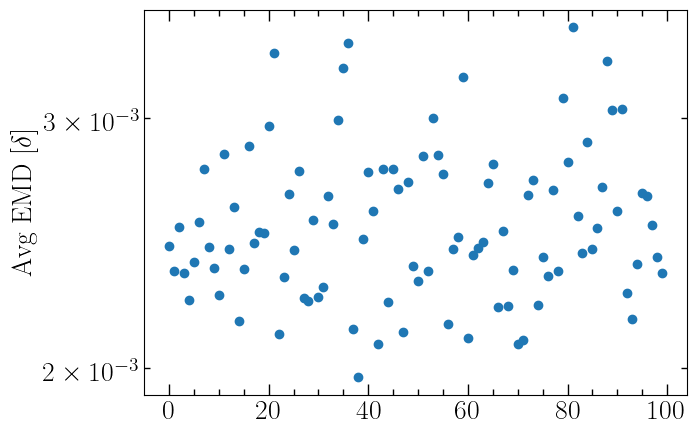

../../models/final/dt1e-1/1
Boudary: reflecting 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0014  std: 0.0008  best: 0.0001 (10)  worst: 0.0045 (7)
[1/dx]	 n_sheets: 2  avg: 0.0028  std: 0.0016  best: 0.0002 (10)  worst: 0.0090 (7)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0014  std: 0.0008  best: 0.0001 (10)  worst: 0.0045 (7)
[1/dx]	 n_sheets: 2  avg: 0.0028  std: 0.0016  best: 0.0002 (10)  worst: 0.0089 (7)


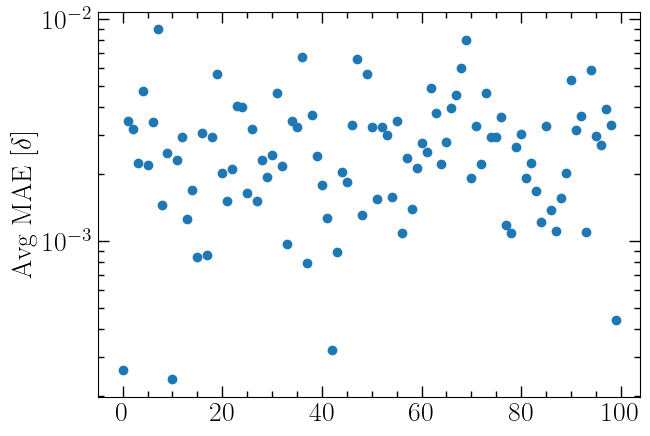

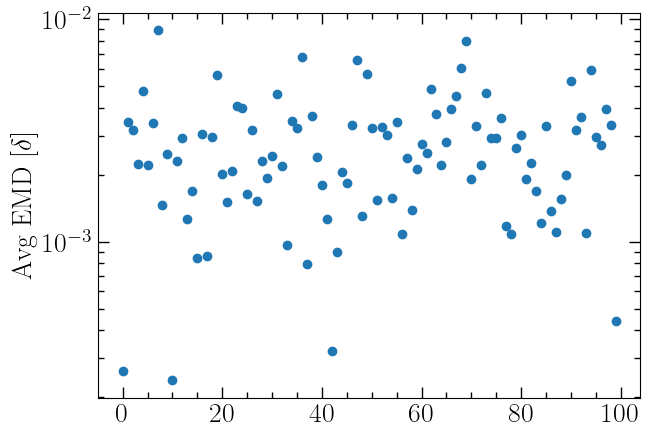

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0009  std: 0.0049  best: 0.0001 (91)  worst: 0.0498 (59)
[1/dx]	 n_sheets: 10  avg: 0.0086  std: 0.0492  best: 0.0014 (91)  worst: 0.4975 (59)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0004  std: 0.0003  best: 0.0001 (91)  worst: 0.0024 (59)
[1/dx]	 n_sheets: 10  avg: 0.0039  std: 0.0031  best: 0.0014 (91)  worst: 0.0243 (59)


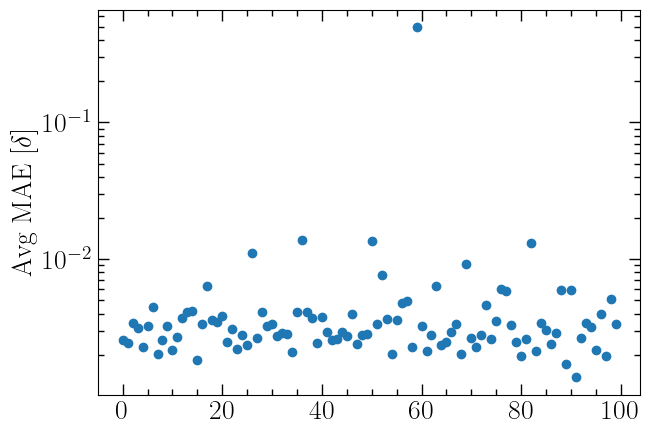

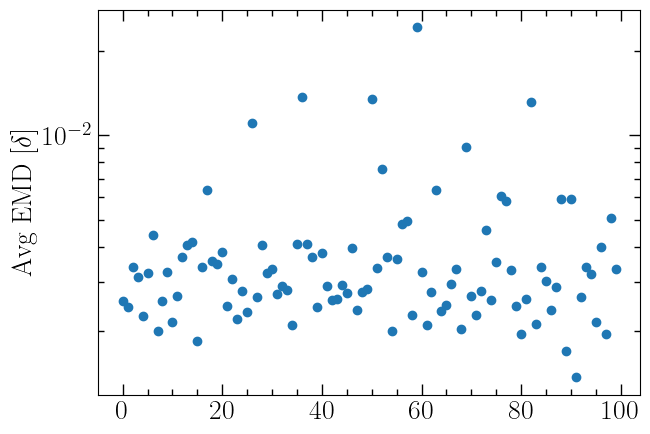

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0001  best: 0.0000 (40)  worst: 0.0006 (93)
[1/dx]	 n_sheets: 100  avg: 0.0045  std: 0.0065  best: 0.0021 (40)  worst: 0.0615 (93)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (40)  worst: 0.0001 (95)
[1/dx]	 n_sheets: 100  avg: 0.0033  std: 0.0008  best: 0.0021 (40)  worst: 0.0083 (95)


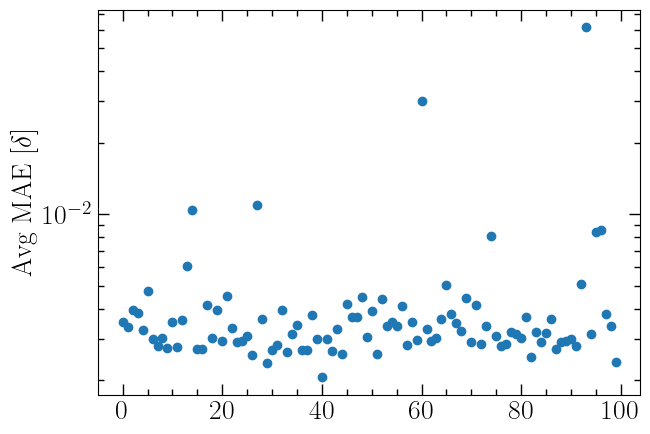

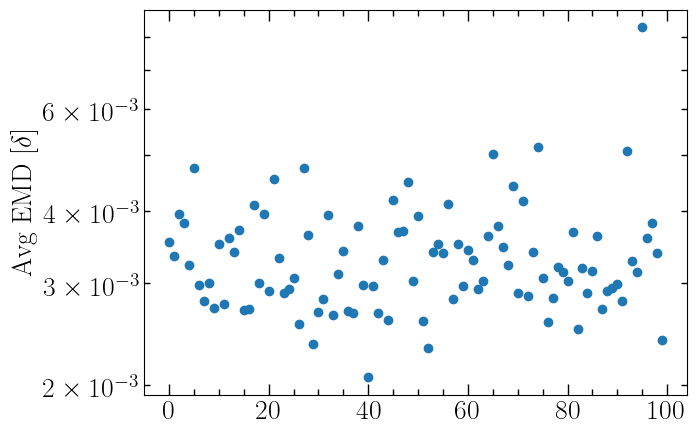

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]

2023-12-29 18:27:43.789149: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 16s:

  slice.8 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime.  XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2023-12-29 18:27:43.789732: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 2m5.424050186s
Constant folding an instruction is taking > 16s:

  slice.8 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't n



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (64)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0063  std: 0.0054  best: 0.0027 (64)  worst: 0.0322 (84)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (64)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0034  std: 0.0004  best: 0.0027 (64)  worst: 0.0045 (84)


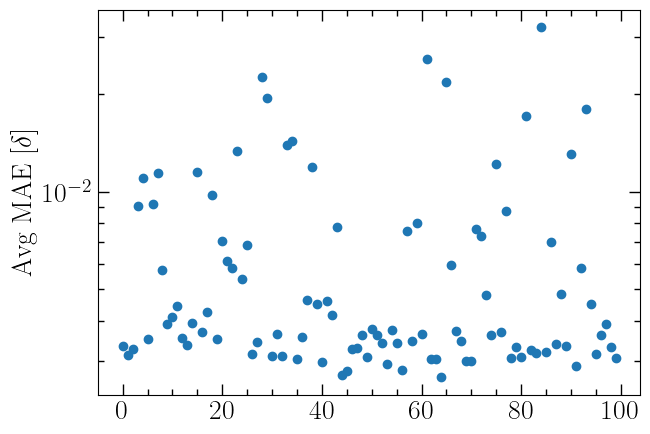

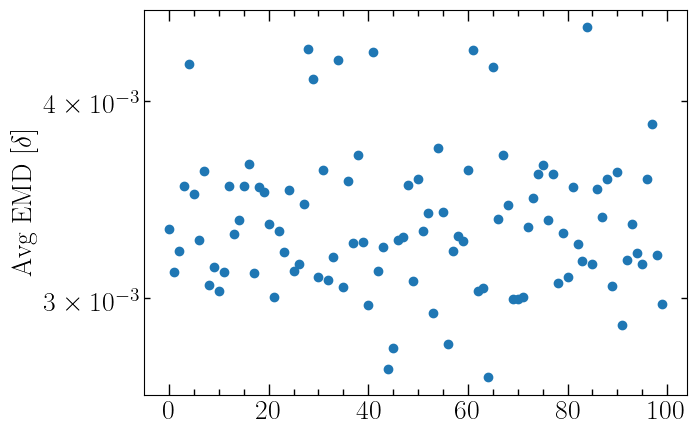

Boudary: periodic 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0012  std: 0.0005  best: 0.0002 (12)  worst: 0.0028 (3)
[1/dx]	 n_sheets: 2  avg: 0.0024  std: 0.0011  best: 0.0004 (12)  worst: 0.0056 (3)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0012  std: 0.0005  best: 0.0002 (12)  worst: 0.0028 (3)
[1/dx]	 n_sheets: 2  avg: 0.0024  std: 0.0011  best: 0.0004 (12)  worst: 0.0056 (3)


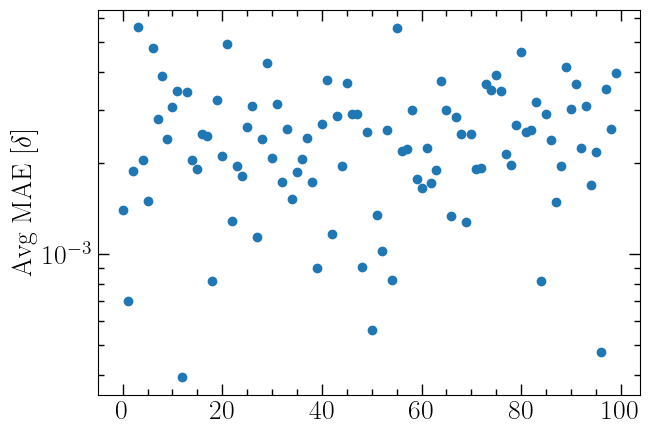

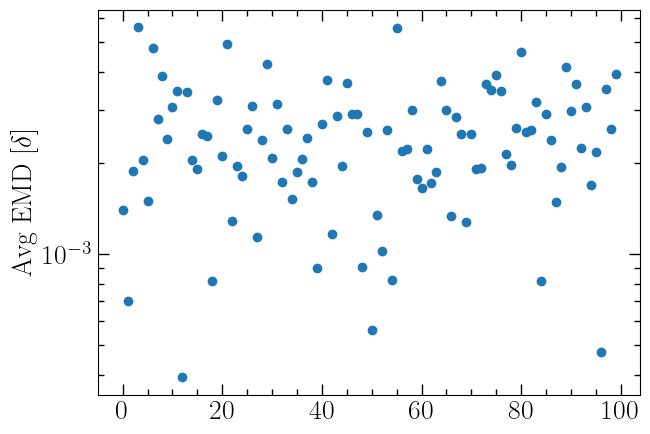

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0003  std: 0.0001  best: 0.0001 (22)  worst: 0.0006 (96)
[1/dx]	 n_sheets: 10  avg: 0.0028  std: 0.0009  best: 0.0013 (22)  worst: 0.0058 (96)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0003  std: 0.0001  best: 0.0001 (22)  worst: 0.0006 (96)
[1/dx]	 n_sheets: 10  avg: 0.0028  std: 0.0009  best: 0.0013 (22)  worst: 0.0058 (96)


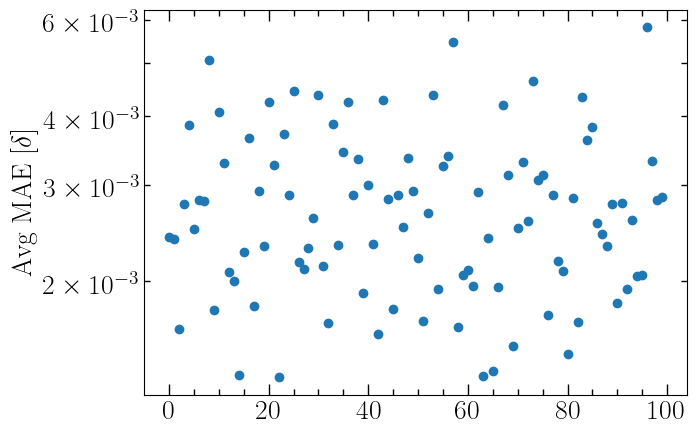

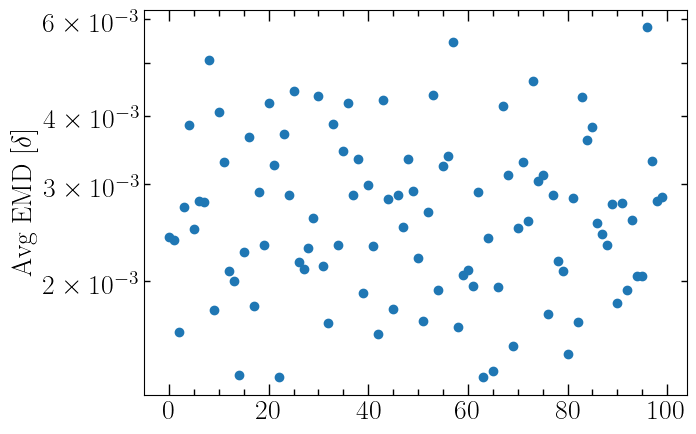

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0001  best: 0.0000 (6)  worst: 0.0008 (92)
[1/dx]	 n_sheets: 100  avg: 0.0048  std: 0.0088  best: 0.0023 (6)  worst: 0.0829 (92)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (6)  worst: 0.0000 (91)
[1/dx]	 n_sheets: 100  avg: 0.0032  std: 0.0006  best: 0.0023 (6)  worst: 0.0049 (91)


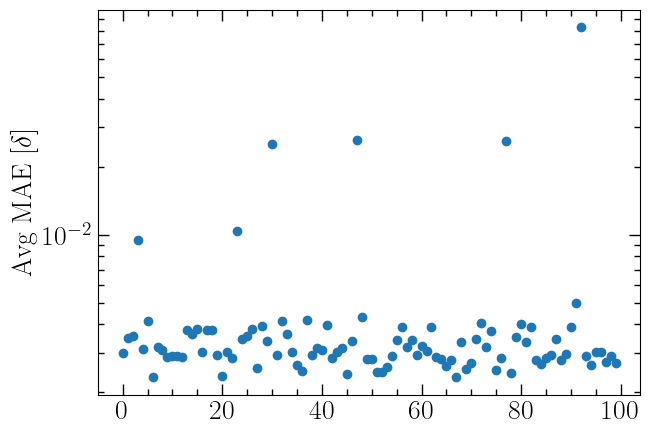

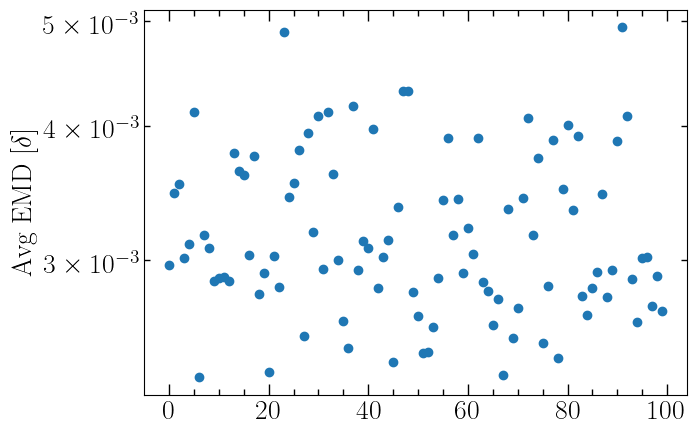

Boudary: periodic 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (97)  worst: 0.0000 (98)
[1/dx]	 n_sheets: 1000  avg: 0.0052  std: 0.0037  best: 0.0028 (97)  worst: 0.0220 (98)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (97)  worst: 0.0000 (89)
[1/dx]	 n_sheets: 1000  avg: 0.0033  std: 0.0003  best: 0.0028 (97)  worst: 0.0052 (89)


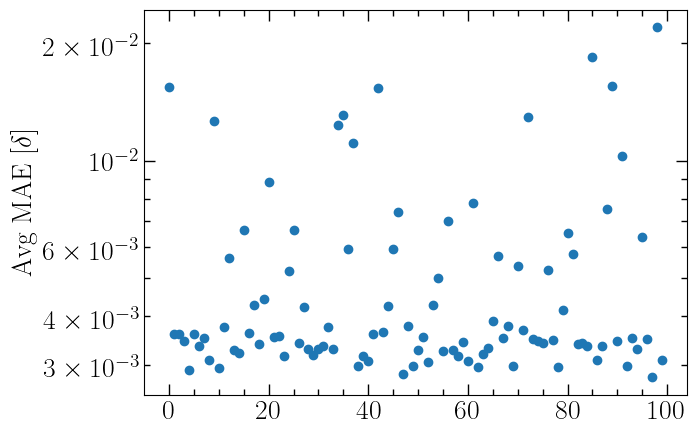

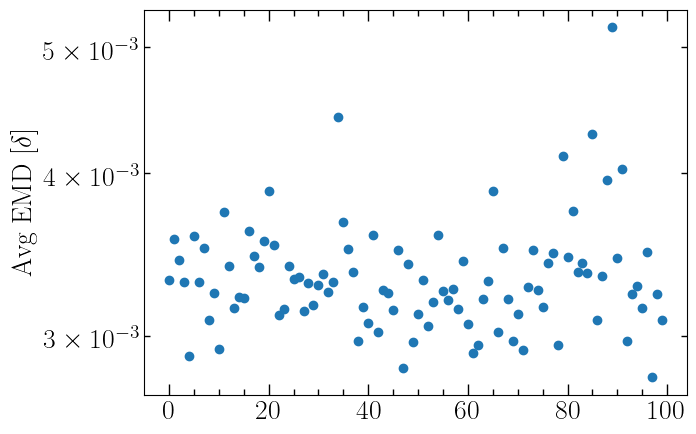

../../models/final/dt1e-1/3
Boudary: reflecting 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0011  std: 0.0008  best: 0.0001 (15)  worst: 0.0050 (73)
[1/dx]	 n_sheets: 2  avg: 0.0022  std: 0.0016  best: 0.0002 (15)  worst: 0.0101 (73)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0011  std: 0.0008  best: 0.0001 (15)  worst: 0.0050 (73)
[1/dx]	 n_sheets: 2  avg: 0.0022  std: 0.0016  best: 0.0002 (15)  worst: 0.0101 (73)


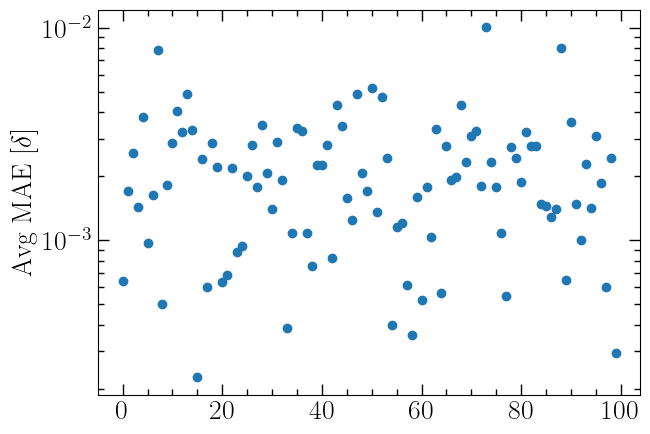

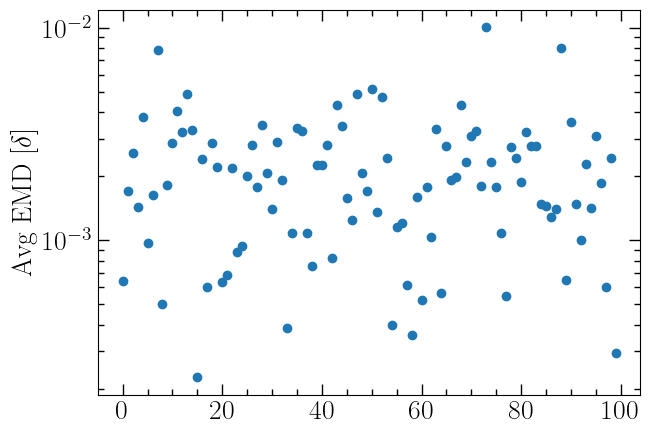

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0003  std: 0.0002  best: 0.0001 (68)  worst: 0.0015 (26)
[1/dx]	 n_sheets: 10  avg: 0.0032  std: 0.0023  best: 0.0009 (68)  worst: 0.0151 (26)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0003  std: 0.0002  best: 0.0001 (68)  worst: 0.0015 (26)
[1/dx]	 n_sheets: 10  avg: 0.0031  std: 0.0023  best: 0.0009 (68)  worst: 0.0151 (26)


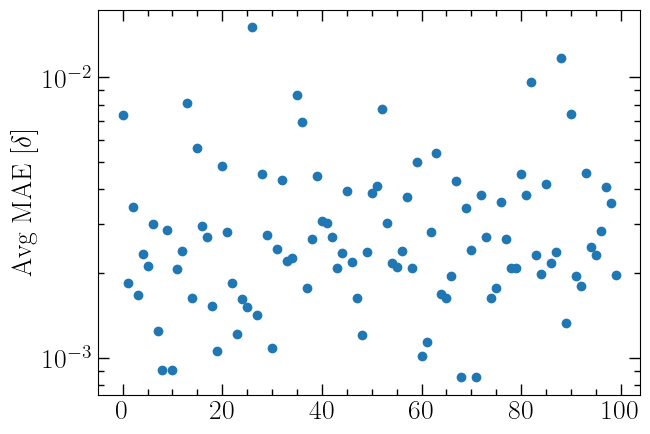

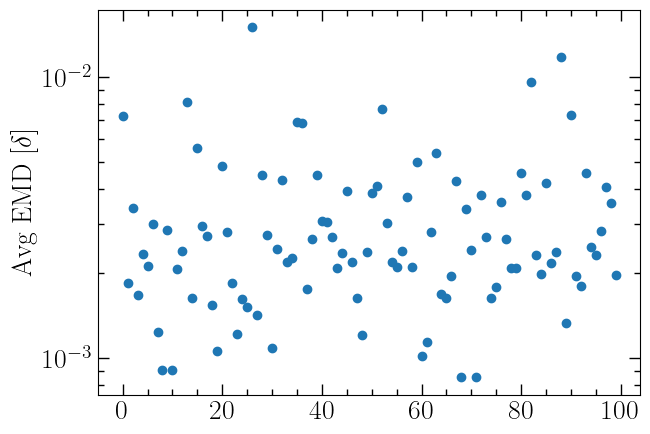

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0001  std: 0.0002  best: 0.0000 (88)  worst: 0.0020 (81)
[1/dx]	 n_sheets: 100  avg: 0.0077  std: 0.0246  best: 0.0017 (88)  worst: 0.2032 (81)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (88)  worst: 0.0001 (95)
[1/dx]	 n_sheets: 100  avg: 0.0030  std: 0.0010  best: 0.0017 (88)  worst: 0.0075 (95)


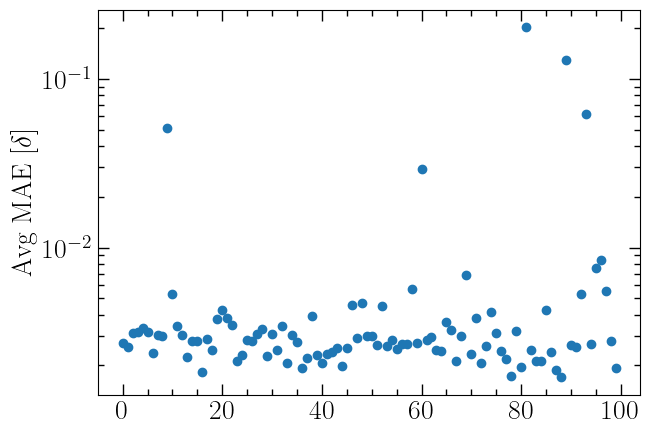

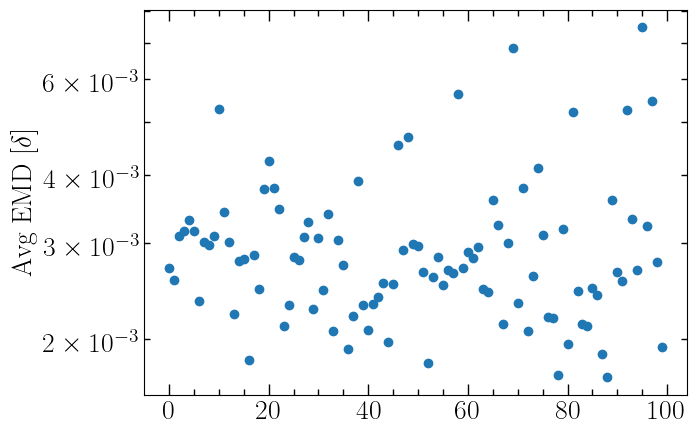

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0009  std: 0.0006  best: 0.0001 (12)  worst: 0.0030 (6)
[1/dx]	 n_sheets: 2  avg: 0.0018  std: 0.0012  best: 0.0002 (12)  worst: 0.0060 (6)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0009  std: 0.0006  best: 0.0001 (12)  worst: 0.0030 (6)
[1/dx]	 n_sheets: 2  avg: 0.0018  std: 0.0012  best: 0.0002 (12)  worst: 0.0060 (6)


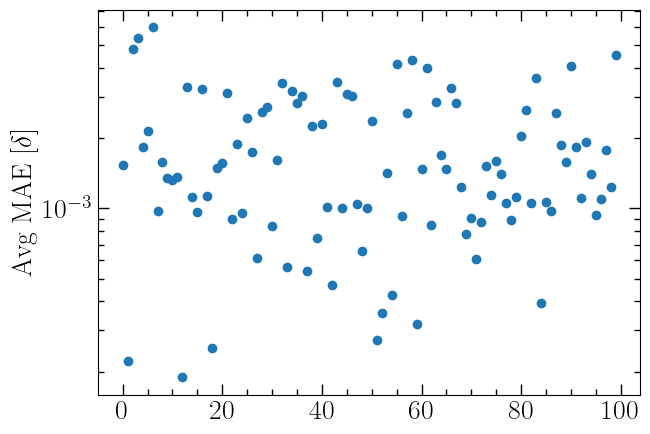

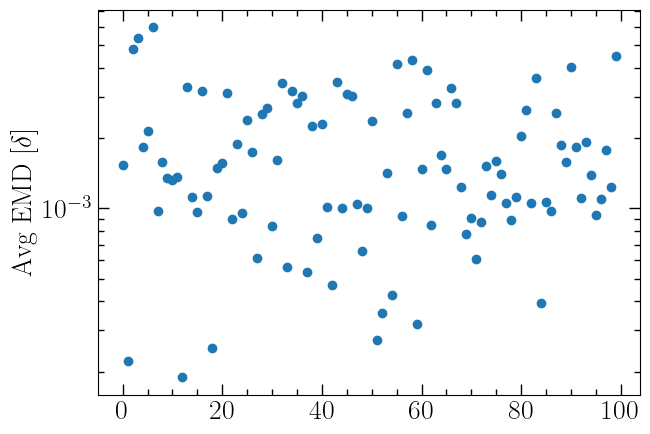

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0001 (19)  worst: 0.0005 (73)
[1/dx]	 n_sheets: 10  avg: 0.0020  std: 0.0008  best: 0.0008 (19)  worst: 0.0046 (73)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0001 (19)  worst: 0.0005 (73)
[1/dx]	 n_sheets: 10  avg: 0.0020  std: 0.0008  best: 0.0008 (19)  worst: 0.0046 (73)


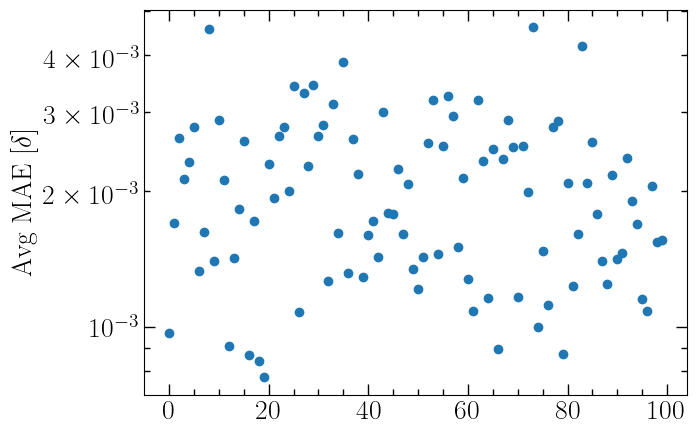

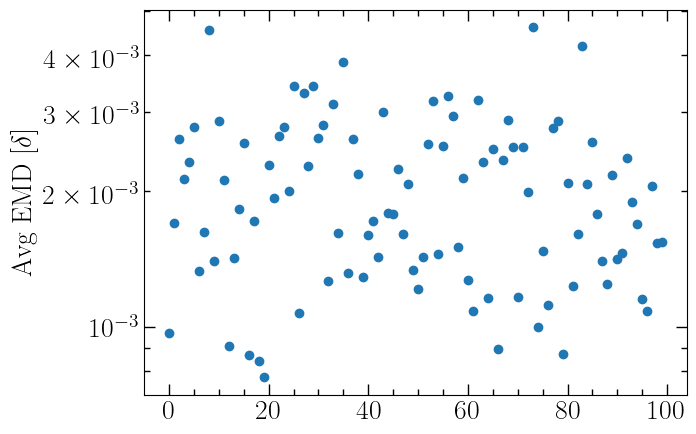

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0001  std: 0.0001  best: 0.0000 (24)  worst: 0.0008 (92)
[1/dx]	 n_sheets: 100  avg: 0.0053  std: 0.0100  best: 0.0018 (24)  worst: 0.0835 (92)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (24)  worst: 0.0001 (73)
[1/dx]	 n_sheets: 100  avg: 0.0029  std: 0.0009  best: 0.0018 (24)  worst: 0.0063 (73)


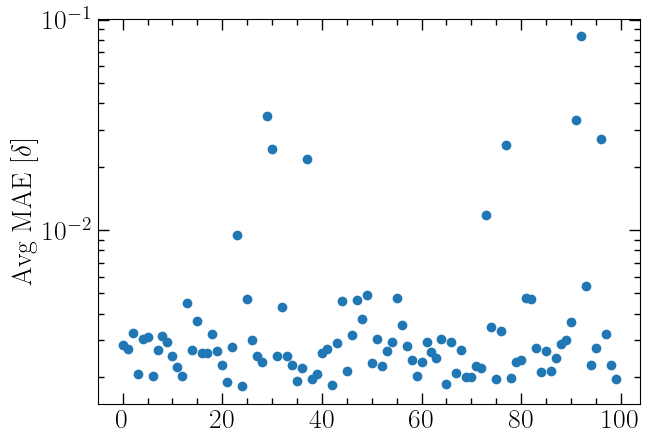

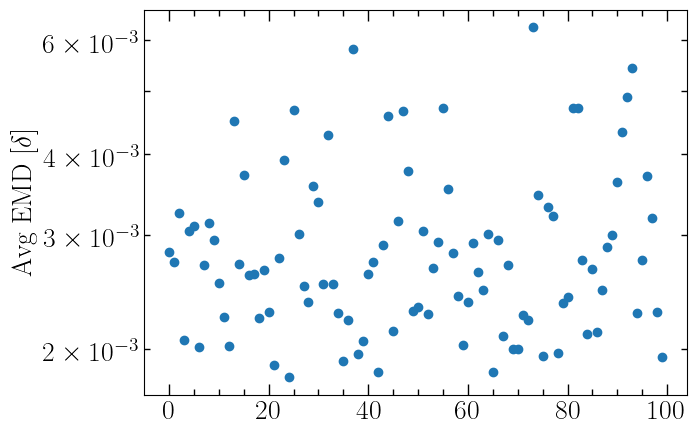

Boudary: periodic 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0004  std: 0.0003  best: 0.0000 (99)  worst: 0.0014 (46)
[1/dx]	 n_sheets: 2  avg: 0.0007  std: 0.0005  best: 0.0000 (99)  worst: 0.0027 (46)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0004  std: 0.0003  best: 0.0000 (99)  worst: 0.0014 (46)
[1/dx]	 n_sheets: 2  avg: 0.0007  std: 0.0005  best: 0.0000 (99)  worst: 0.0027 (46)


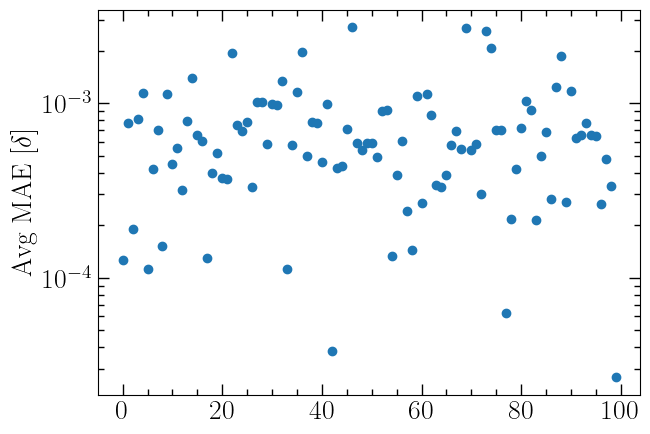

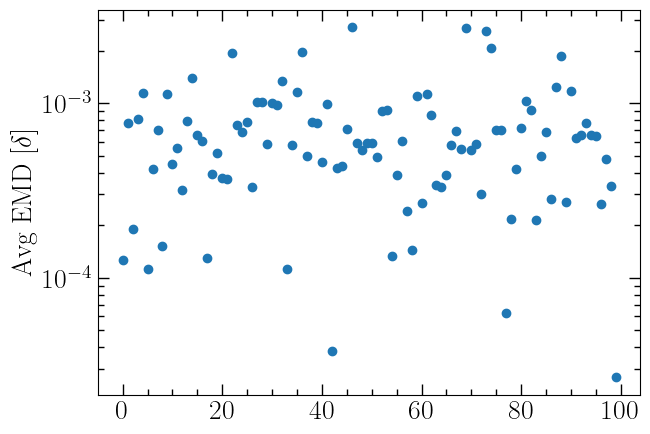

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0001  std: 0.0000  best: 0.0000 (61)  worst: 0.0003 (59)
[1/dx]	 n_sheets: 10  avg: 0.0008  std: 0.0004  best: 0.0002 (61)  worst: 0.0031 (59)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0001  std: 0.0000  best: 0.0000 (61)  worst: 0.0003 (59)
[1/dx]	 n_sheets: 10  avg: 0.0008  std: 0.0004  best: 0.0002 (61)  worst: 0.0031 (59)


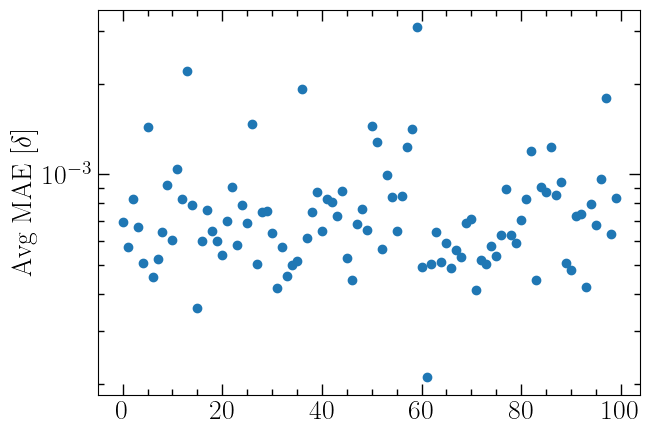

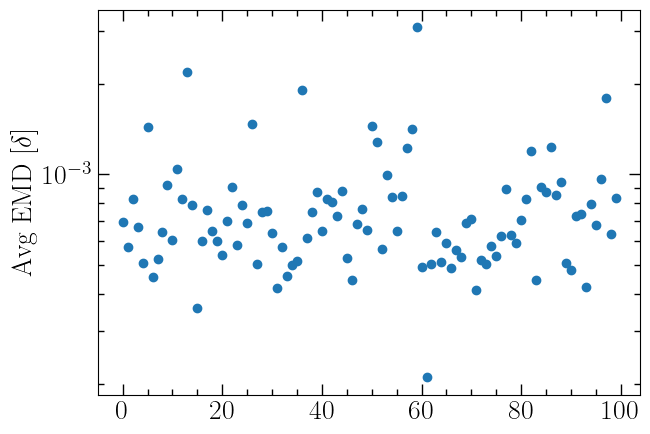

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (26)  worst: 0.0001 (14)
[1/dx]	 n_sheets: 100  avg: 0.0008  std: 0.0008  best: 0.0005 (26)  worst: 0.0085 (14)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (26)  worst: 0.0000 (14)
[1/dx]	 n_sheets: 100  avg: 0.0007  std: 0.0002  best: 0.0005 (26)  worst: 0.0021 (14)


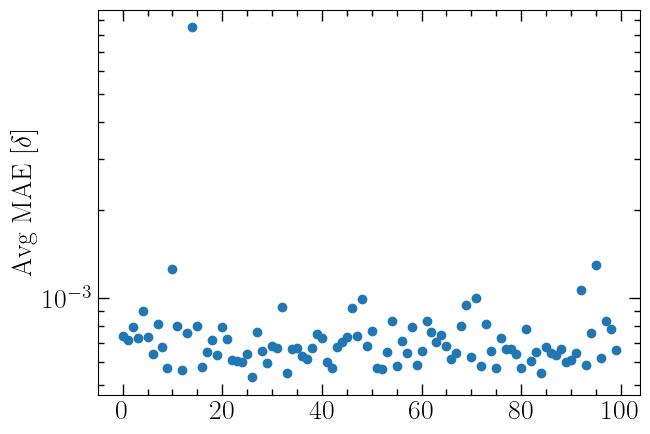

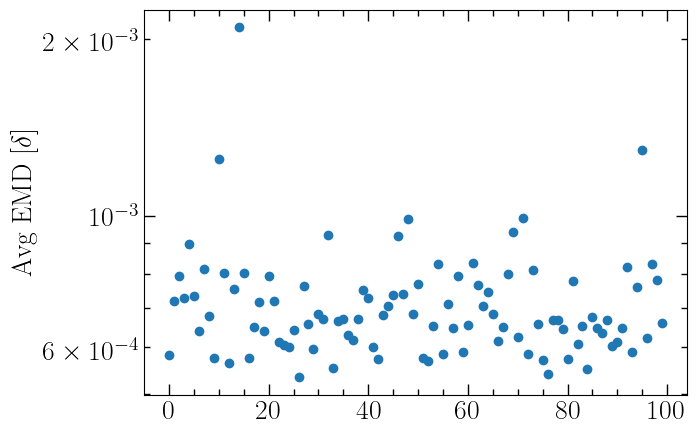

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (25)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0016  std: 0.0040  best: 0.0006 (25)  worst: 0.0326 (84)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (25)  worst: 0.0000 (65)
[1/dx]	 n_sheets: 1000  avg: 0.0007  std: 0.0001  best: 0.0006 (25)  worst: 0.0011 (65)


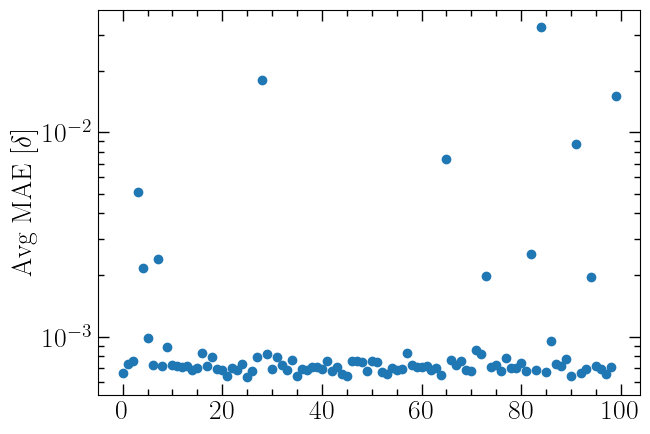

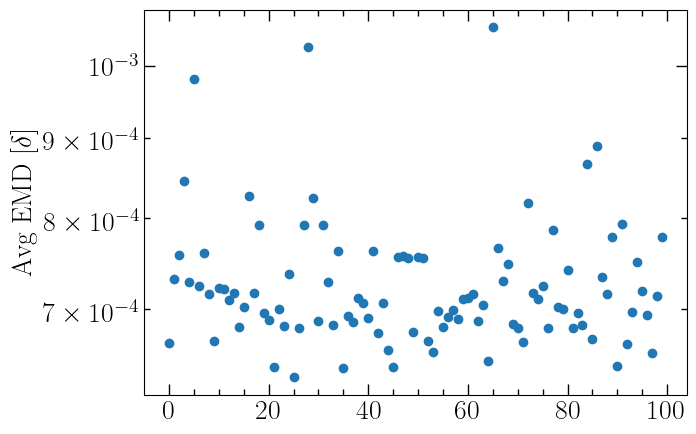

Boudary: periodic 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0002  std: 0.0001  best: 0.0000 (12)  worst: 0.0005 (45)
[1/dx]	 n_sheets: 2  avg: 0.0004  std: 0.0002  best: 0.0000 (12)  worst: 0.0009 (45)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0002  std: 0.0001  best: 0.0000 (12)  worst: 0.0005 (45)
[1/dx]	 n_sheets: 2  avg: 0.0004  std: 0.0002  best: 0.0000 (12)  worst: 0.0009 (45)


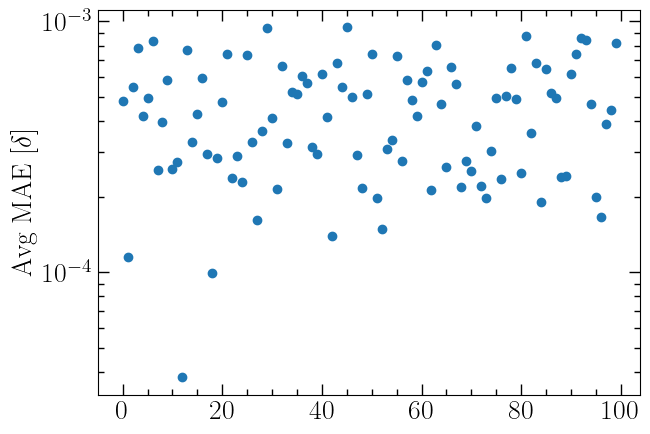

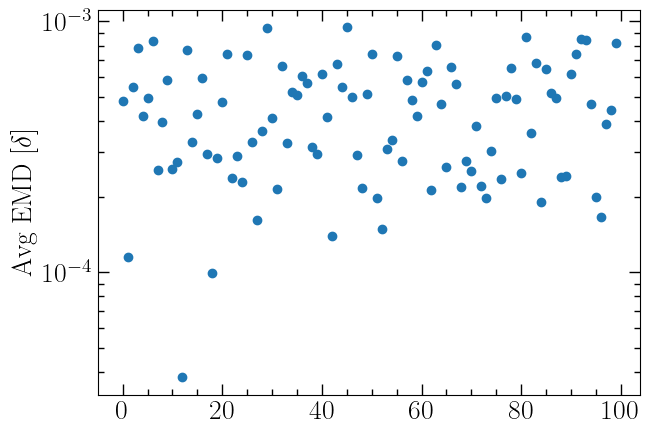

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0001  std: 0.0000  best: 0.0000 (12)  worst: 0.0001 (4)
[1/dx]	 n_sheets: 10  avg: 0.0006  std: 0.0001  best: 0.0003 (12)  worst: 0.0012 (4)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0001  std: 0.0000  best: 0.0000 (12)  worst: 0.0001 (4)
[1/dx]	 n_sheets: 10  avg: 0.0006  std: 0.0001  best: 0.0003 (12)  worst: 0.0012 (4)


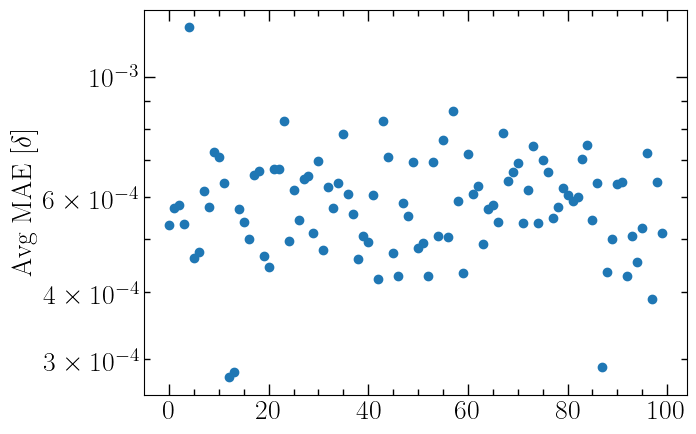

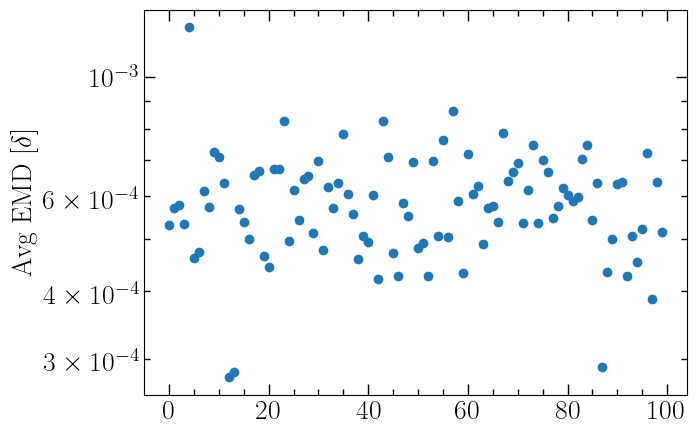

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (86)  worst: 0.0002 (96)
[1/dx]	 n_sheets: 100  avg: 0.0011  std: 0.0030  best: 0.0005 (86)  worst: 0.0232 (96)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (86)  worst: 0.0000 (83)
[1/dx]	 n_sheets: 100  avg: 0.0007  std: 0.0001  best: 0.0005 (86)  worst: 0.0014 (83)


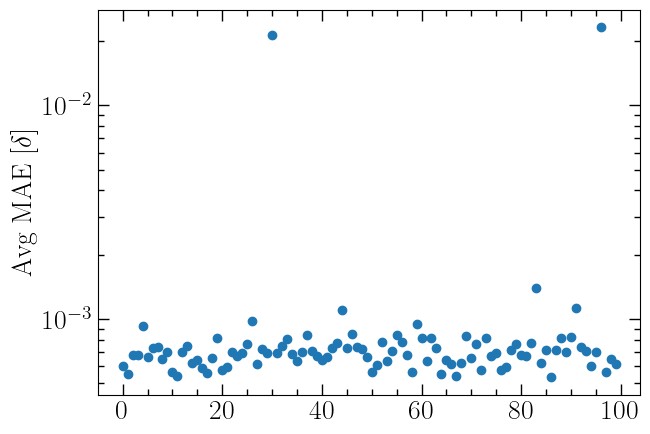

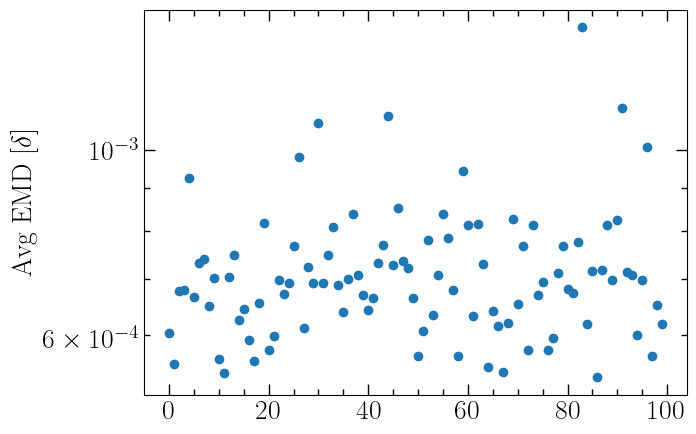

Boudary: periodic 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0002  std: 0.0003  best: 0.0000 (42)  worst: 0.0016 (68)
[1/dx]	 n_sheets: 2  avg: 0.0004  std: 0.0006  best: 0.0000 (42)  worst: 0.0032 (68)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0002  std: 0.0003  best: 0.0000 (42)  worst: 0.0016 (68)
[1/dx]	 n_sheets: 2  avg: 0.0004  std: 0.0006  best: 0.0000 (42)  worst: 0.0032 (68)


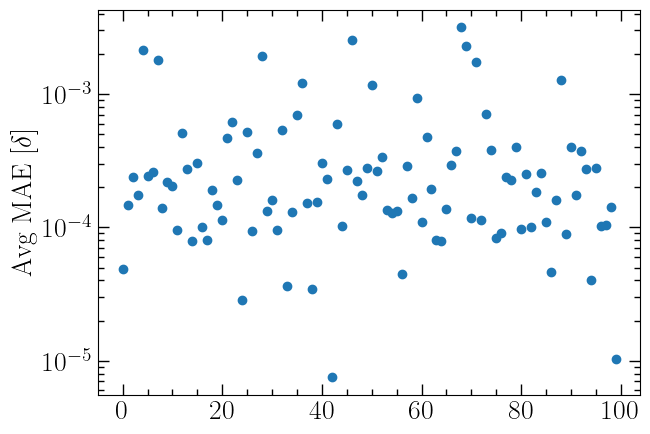

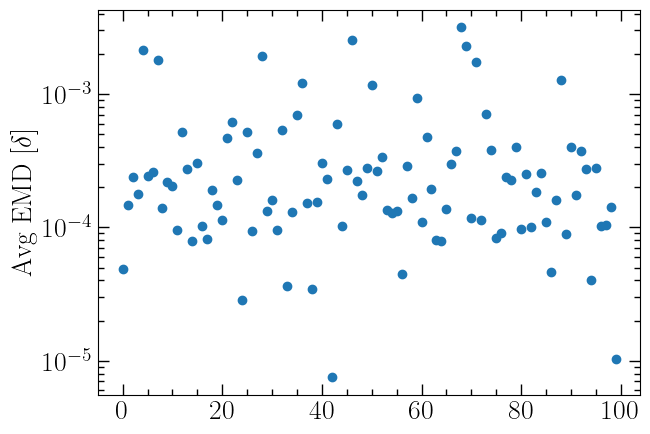

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (99)  worst: 0.0001 (59)
[1/dx]	 n_sheets: 10  avg: 0.0003  std: 0.0002  best: 0.0001 (99)  worst: 0.0014 (59)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (99)  worst: 0.0001 (59)
[1/dx]	 n_sheets: 10  avg: 0.0003  std: 0.0002  best: 0.0001 (99)  worst: 0.0014 (59)


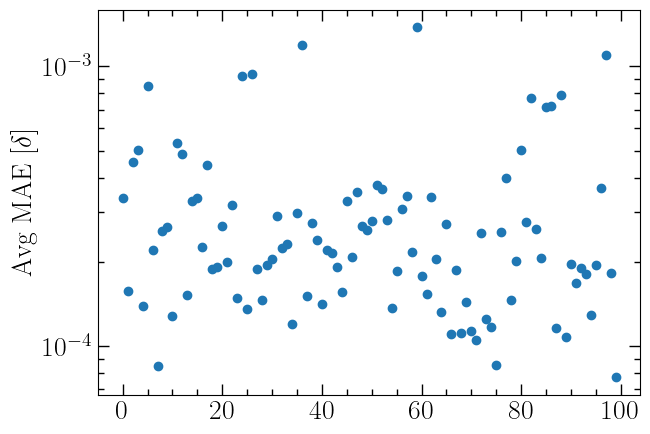

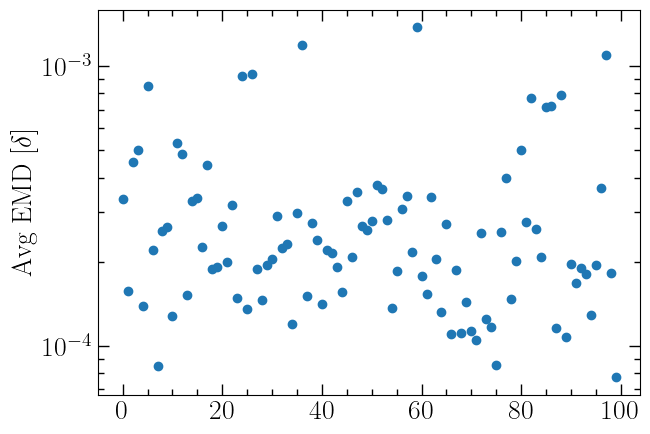

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (89)  worst: 0.0001 (14)
[1/dx]	 n_sheets: 100  avg: 0.0003  std: 0.0008  best: 0.0001 (89)  worst: 0.0081 (14)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (89)  worst: 0.0000 (14)
[1/dx]	 n_sheets: 100  avg: 0.0003  std: 0.0002  best: 0.0001 (89)  worst: 0.0017 (14)


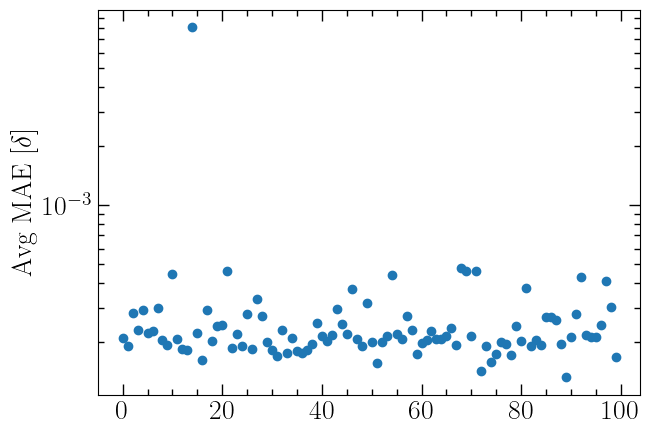

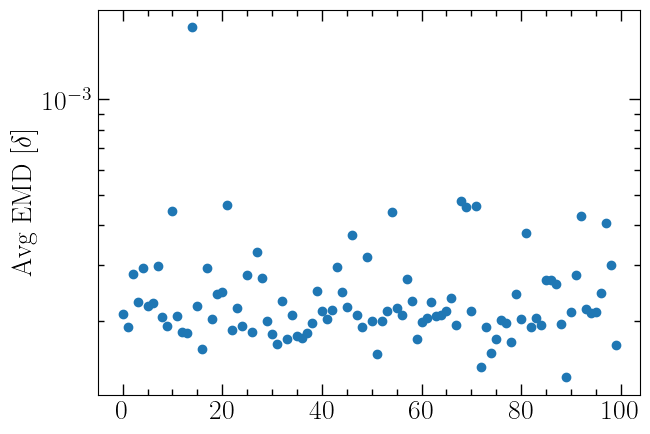

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (53)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0007  std: 0.0029  best: 0.0002 (53)  worst: 0.0253 (84)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (53)  worst: 0.0000 (29)
[1/dx]	 n_sheets: 1000  avg: 0.0002  std: 0.0000  best: 0.0002 (53)  worst: 0.0005 (29)


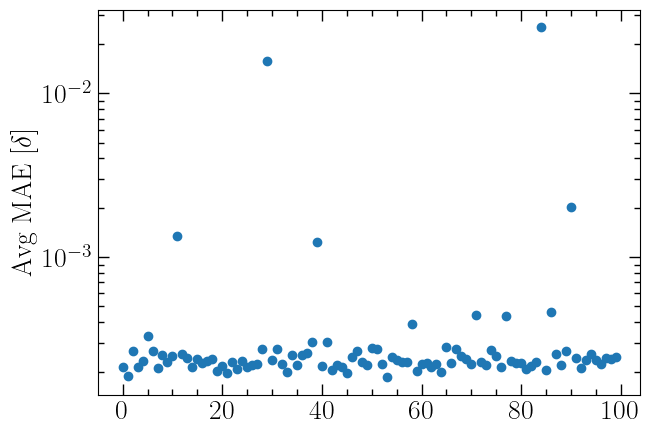

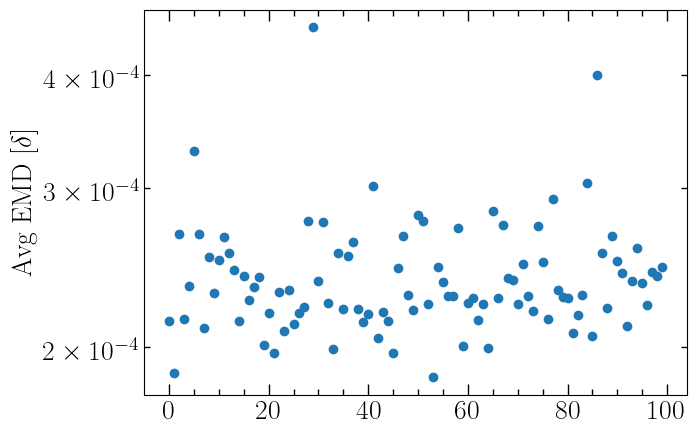

Boudary: periodic 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0001  std: 0.0000  best: 0.0000 (12)  worst: 0.0002 (48)
[1/dx]	 n_sheets: 2  avg: 0.0002  std: 0.0001  best: 0.0000 (12)  worst: 0.0004 (48)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0001  std: 0.0000  best: 0.0000 (12)  worst: 0.0002 (48)
[1/dx]	 n_sheets: 2  avg: 0.0002  std: 0.0001  best: 0.0000 (12)  worst: 0.0004 (48)


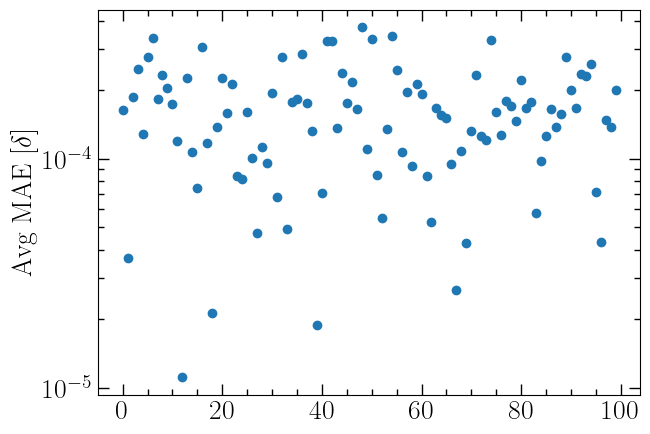

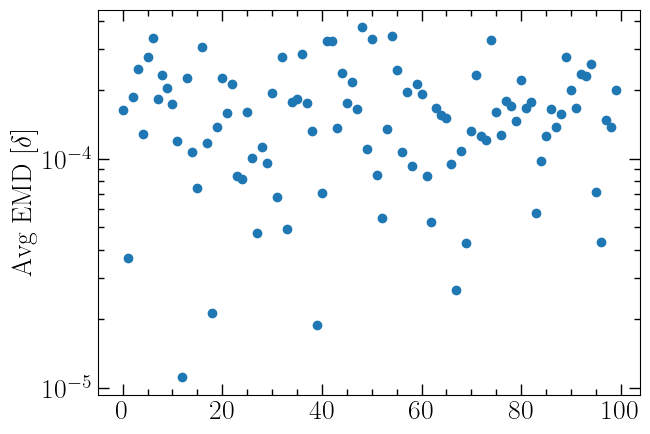

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (67)  worst: 0.0000 (2)
[1/dx]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0001 (67)  worst: 0.0005 (2)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (67)  worst: 0.0000 (2)
[1/dx]	 n_sheets: 10  avg: 0.0002  std: 0.0001  best: 0.0001 (67)  worst: 0.0005 (2)


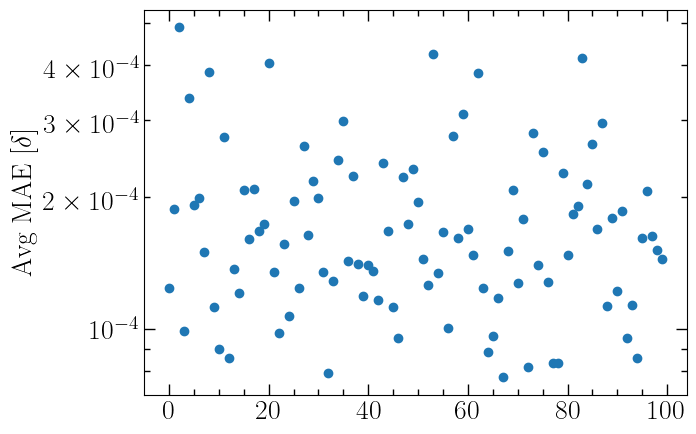

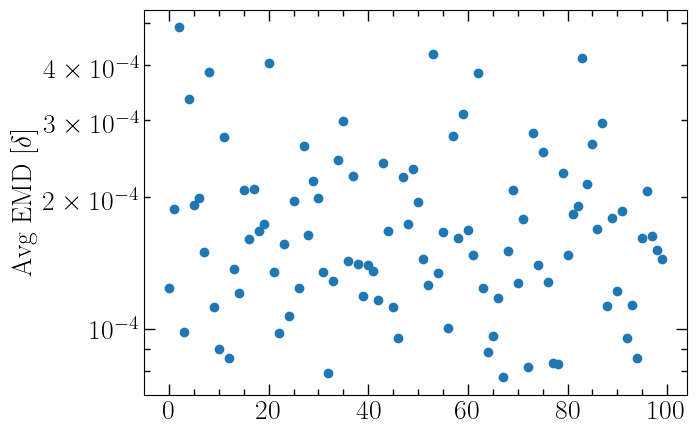

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (78)  worst: 0.0000 (26)
[1/dx]	 n_sheets: 100  avg: 0.0002  std: 0.0001  best: 0.0002 (78)  worst: 0.0008 (26)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (78)  worst: 0.0000 (26)
[1/dx]	 n_sheets: 100  avg: 0.0002  std: 0.0001  best: 0.0002 (78)  worst: 0.0008 (26)


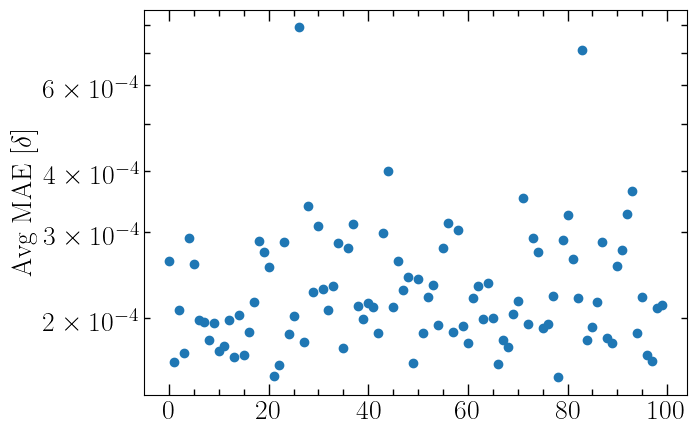

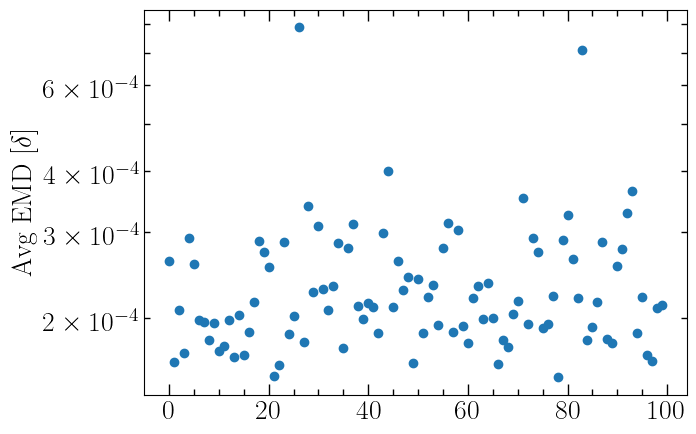

Boudary: periodic 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (76)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0003  std: 0.0003  best: 0.0002 (76)  worst: 0.0035 (84)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (76)  worst: 0.0000 (91)
[1/dx]	 n_sheets: 1000  avg: 0.0002  std: 0.0000  best: 0.0002 (76)  worst: 0.0003 (91)


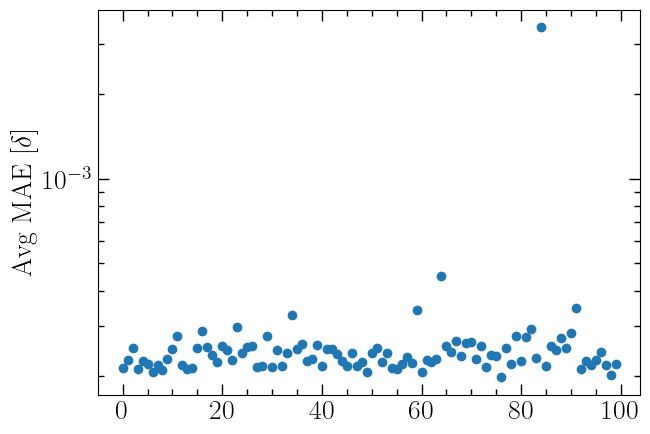

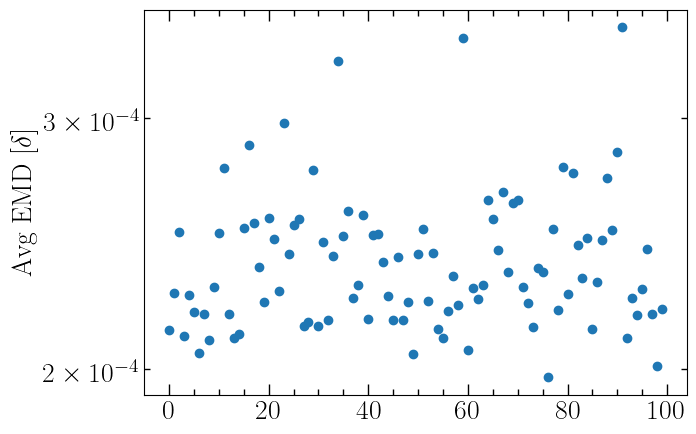

../../models/final/dt1e-2/0
Boudary: reflecting 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0002  std: 0.0002  best: 0.0000 (99)  worst: 0.0019 (68)
[1/dx]	 n_sheets: 2  avg: 0.0004  std: 0.0004  best: 0.0000 (99)  worst: 0.0038 (68)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0002  std: 0.0002  best: 0.0000 (99)  worst: 0.0019 (68)
[1/dx]	 n_sheets: 2  avg: 0.0004  std: 0.0004  best: 0.0000 (99)  worst: 0.0038 (68)


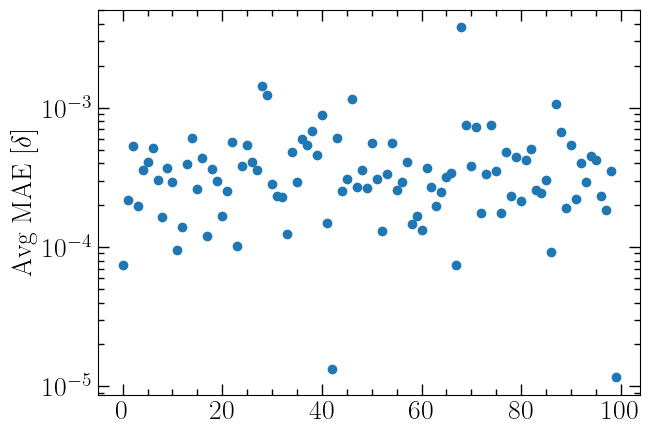

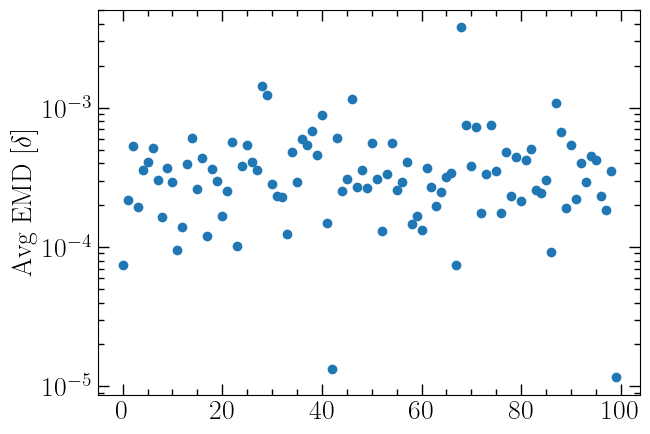

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (95)  worst: 0.0002 (59)
[1/dx]	 n_sheets: 10  avg: 0.0004  std: 0.0002  best: 0.0002 (95)  worst: 0.0015 (59)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (95)  worst: 0.0002 (59)
[1/dx]	 n_sheets: 10  avg: 0.0004  std: 0.0002  best: 0.0002 (95)  worst: 0.0015 (59)


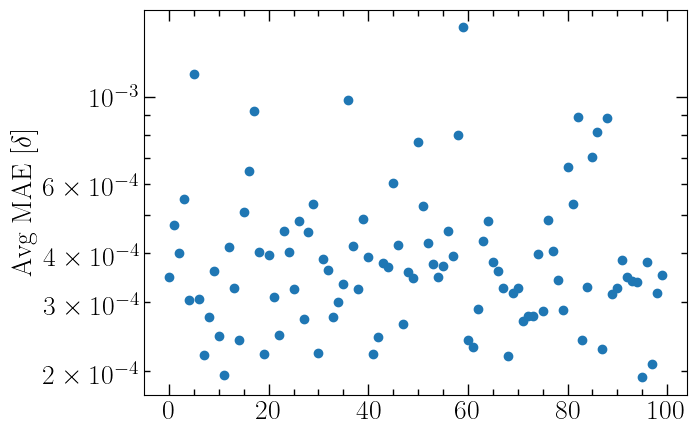

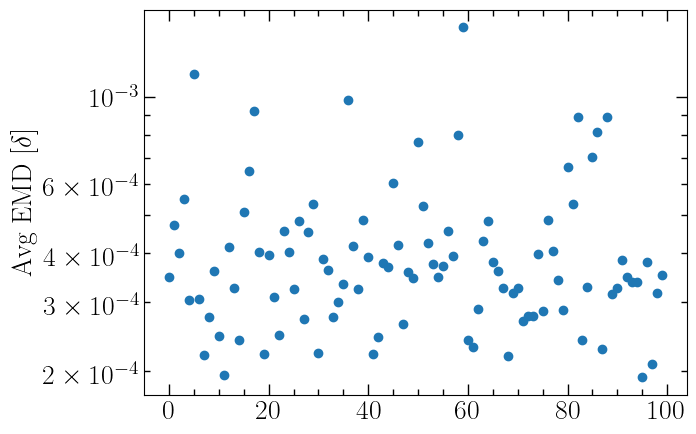

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (89)  worst: 0.0000 (54)
[1/dx]	 n_sheets: 100  avg: 0.0004  std: 0.0001  best: 0.0002 (89)  worst: 0.0006 (54)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (89)  worst: 0.0000 (54)
[1/dx]	 n_sheets: 100  avg: 0.0004  std: 0.0001  best: 0.0002 (89)  worst: 0.0006 (54)


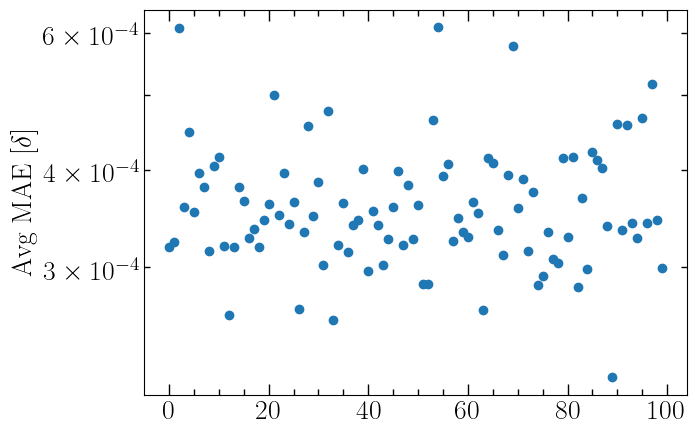

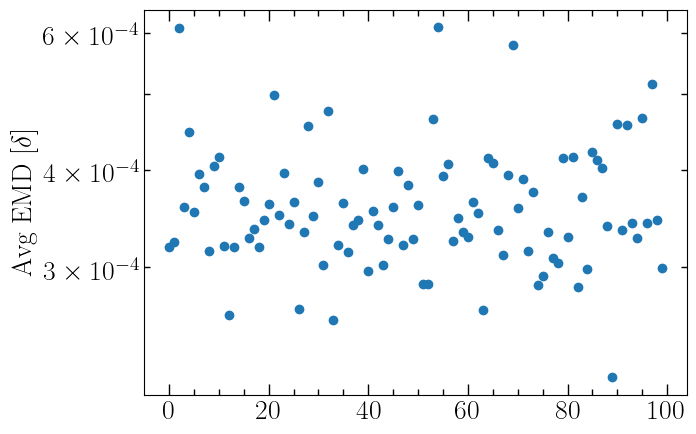

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (0)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0011  std: 0.0038  best: 0.0003 (0)  worst: 0.0323 (84)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (0)  worst: 0.0000 (84)
[1/dx]	 n_sheets: 1000  avg: 0.0004  std: 0.0000  best: 0.0003 (0)  worst: 0.0005 (84)


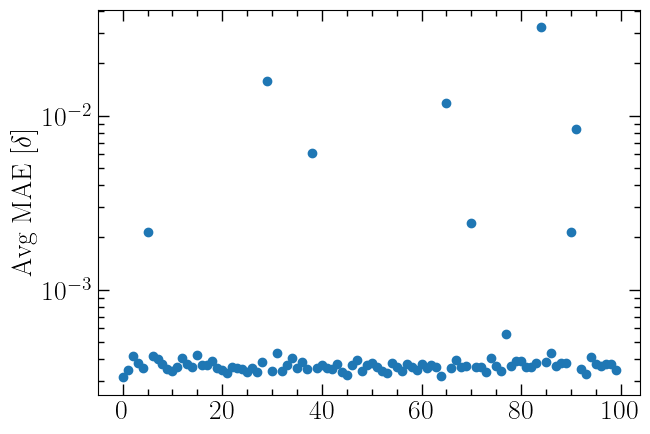

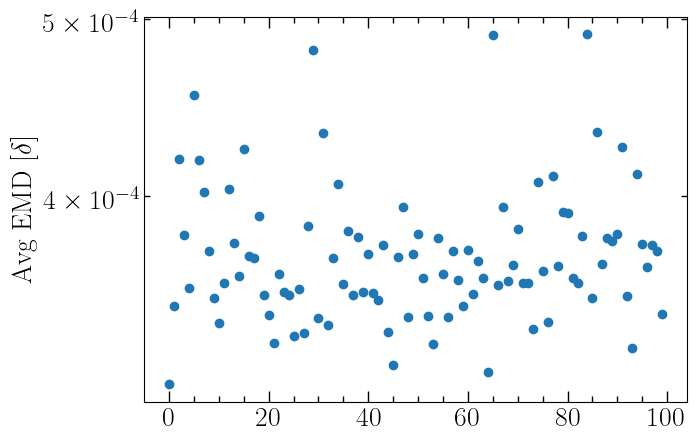

Boudary: periodic 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0001  std: 0.0001  best: 0.0000 (18)  worst: 0.0004 (54)
[1/dx]	 n_sheets: 2  avg: 0.0002  std: 0.0001  best: 0.0000 (18)  worst: 0.0007 (54)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0001  std: 0.0001  best: 0.0000 (18)  worst: 0.0004 (54)
[1/dx]	 n_sheets: 2  avg: 0.0002  std: 0.0001  best: 0.0000 (18)  worst: 0.0007 (54)


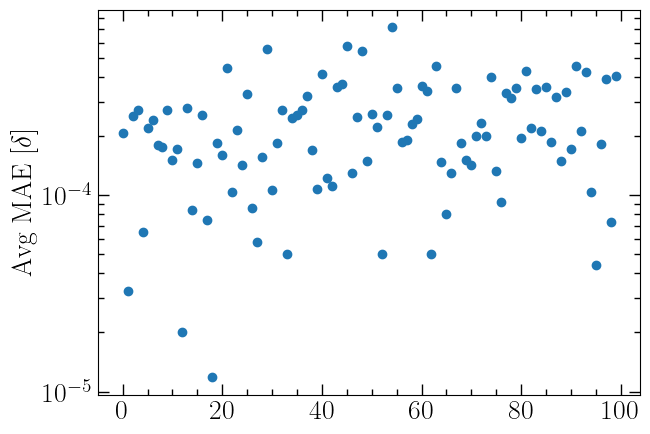

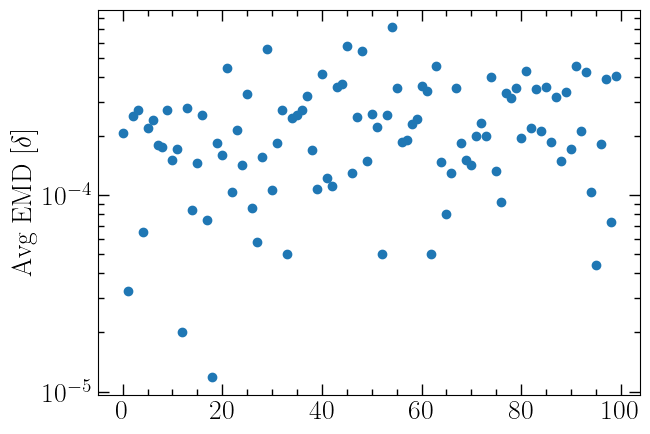

Boudary: periodic 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (12)  worst: 0.0001 (23)
[1/dx]	 n_sheets: 10  avg: 0.0003  std: 0.0001  best: 0.0001 (12)  worst: 0.0006 (23)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (12)  worst: 0.0001 (23)
[1/dx]	 n_sheets: 10  avg: 0.0003  std: 0.0001  best: 0.0001 (12)  worst: 0.0006 (23)


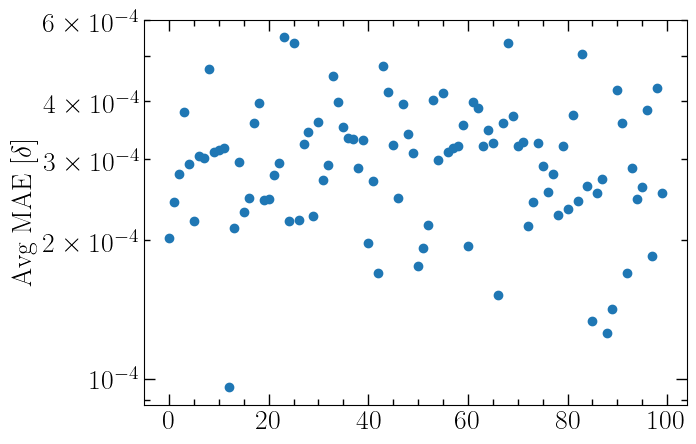

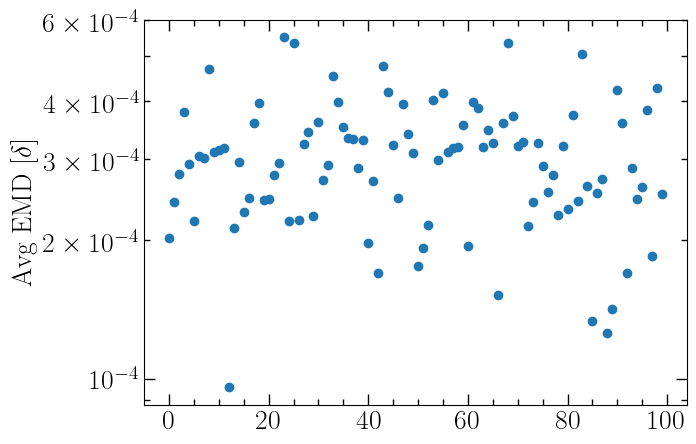

Boudary: periodic 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (21)  worst: 0.0002 (30)
[1/dx]	 n_sheets: 100  avg: 0.0006  std: 0.0020  best: 0.0002 (21)  worst: 0.0209 (30)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (21)  worst: 0.0000 (83)
[1/dx]	 n_sheets: 100  avg: 0.0004  std: 0.0001  best: 0.0002 (21)  worst: 0.0008 (83)


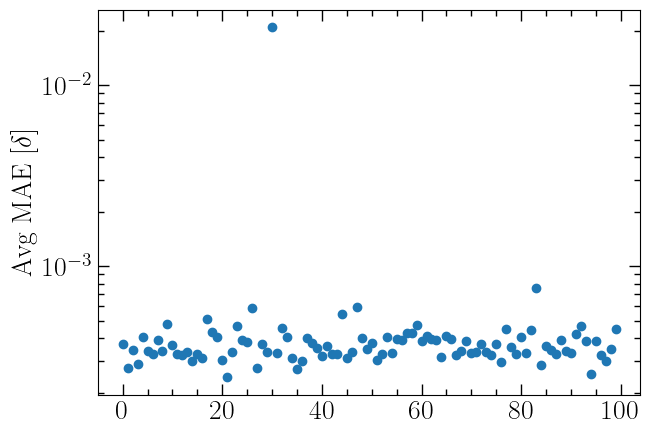

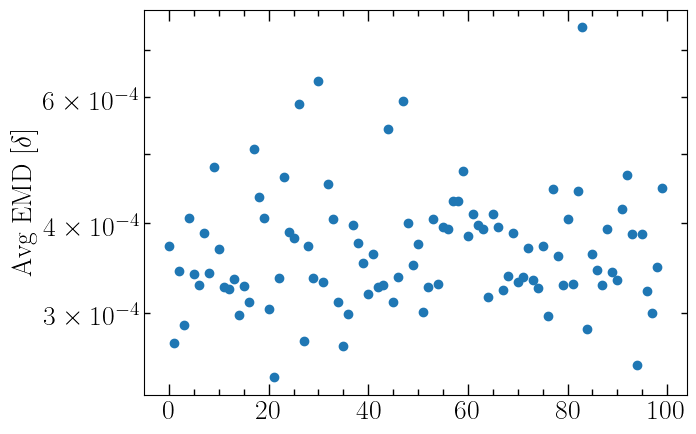

Boudary: periodic 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (28)  worst: 0.0000 (72)
[1/dx]	 n_sheets: 1000  avg: 0.0004  std: 0.0002  best: 0.0003 (28)  worst: 0.0020 (72)
Wasserstein
[1/L]	 n_sheets: 1000  avg: 0.0000  std: 0.0000  best: 0.0000 (28)  worst: 0.0000 (91)
[1/dx]	 n_sheets: 1000  avg: 0.0004  std: 0.0000  best: 0.0003 (28)  worst: 0.0005 (91)


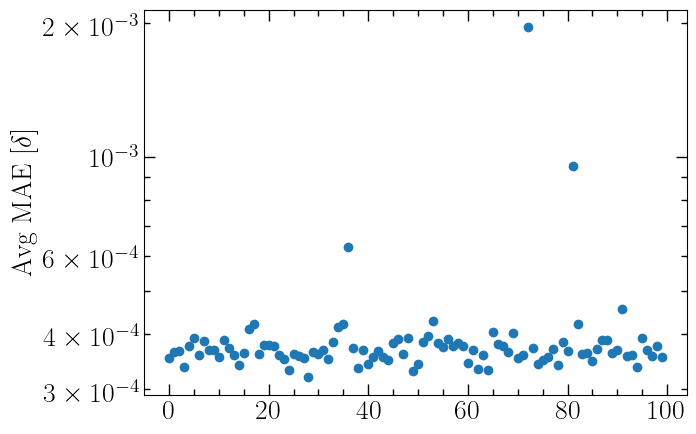

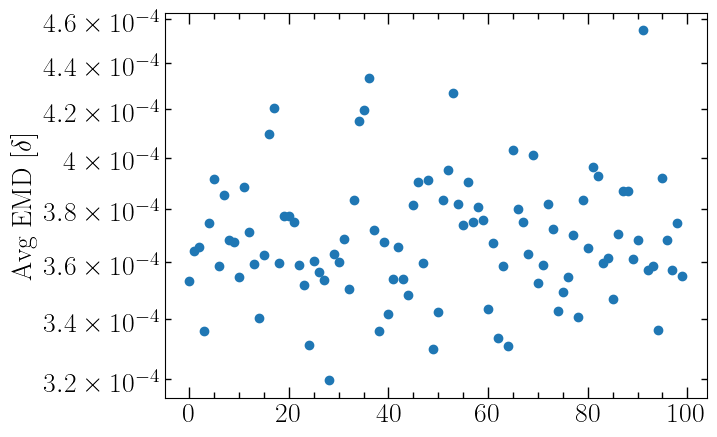

../../models/final/dt1e-2/1
Boudary: reflecting 	 #Sheets: 2


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 2  avg: 0.0002  std: 0.0003  best: 0.0000 (99)  worst: 0.0019 (36)
[1/dx]	 n_sheets: 2  avg: 0.0004  std: 0.0007  best: 0.0000 (99)  worst: 0.0039 (36)
Wasserstein
[1/L]	 n_sheets: 2  avg: 0.0002  std: 0.0003  best: 0.0000 (99)  worst: 0.0019 (36)
[1/dx]	 n_sheets: 2  avg: 0.0004  std: 0.0007  best: 0.0000 (99)  worst: 0.0039 (36)


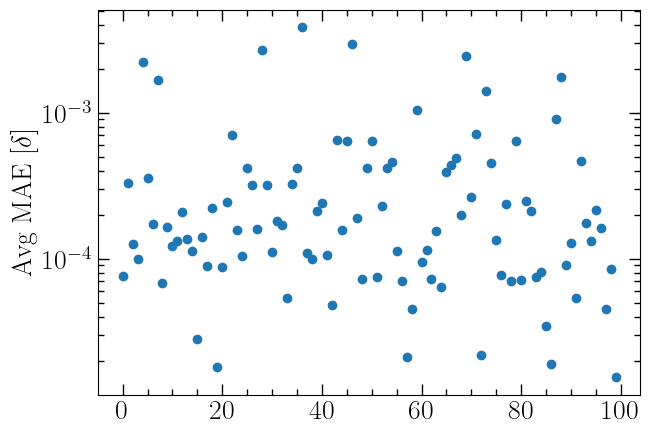

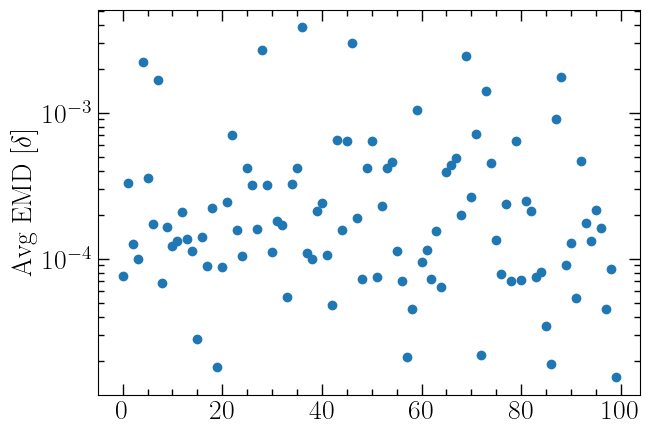

Boudary: reflecting 	 #Sheets: 10


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (10)  worst: 0.0002 (97)
[1/dx]	 n_sheets: 10  avg: 0.0003  std: 0.0003  best: 0.0001 (10)  worst: 0.0018 (97)
Wasserstein
[1/L]	 n_sheets: 10  avg: 0.0000  std: 0.0000  best: 0.0000 (10)  worst: 0.0002 (97)
[1/dx]	 n_sheets: 10  avg: 0.0003  std: 0.0003  best: 0.0001 (10)  worst: 0.0018 (97)


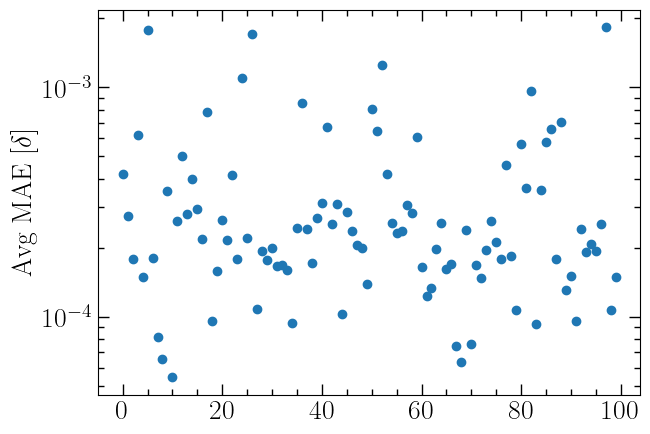

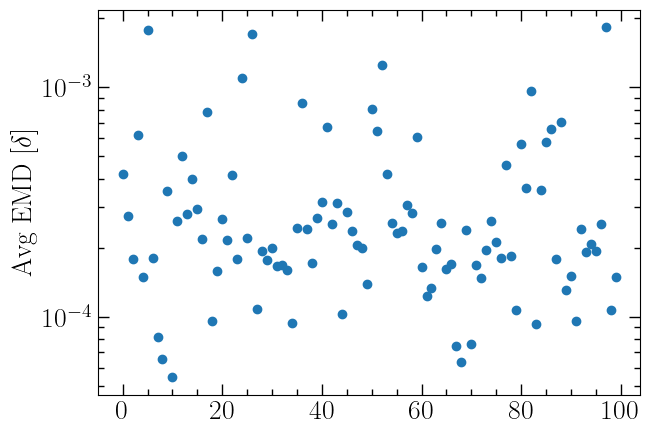

Boudary: reflecting 	 #Sheets: 100


  0%|          | 0/100 [00:00<?, ?it/s]



[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (16)  worst: 0.0001 (14)
[1/dx]	 n_sheets: 100  avg: 0.0004  std: 0.0008  best: 0.0001 (16)  worst: 0.0086 (14)
Wasserstein
[1/L]	 n_sheets: 100  avg: 0.0000  std: 0.0000  best: 0.0000 (16)  worst: 0.0000 (14)
[1/dx]	 n_sheets: 100  avg: 0.0003  std: 0.0002  best: 0.0001 (16)  worst: 0.0022 (14)


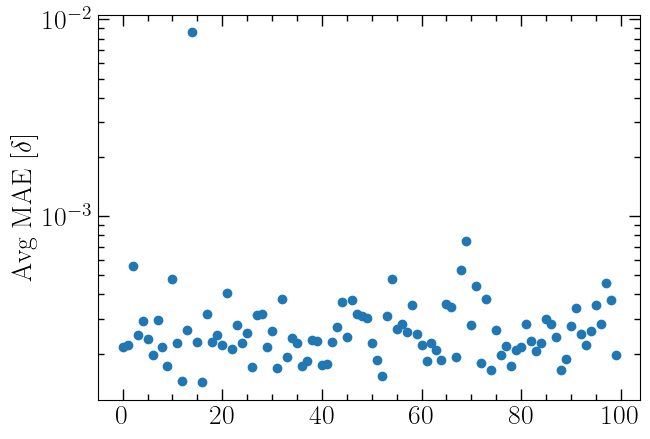

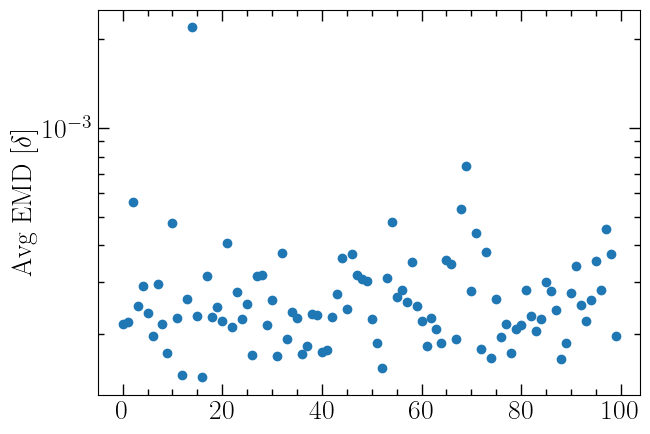

Boudary: reflecting 	 #Sheets: 1000


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
N_SHEETS = [2, 10, 100, 1000]
results = dict()

for dt in [1e-1, 1e-2]:
    
    results[dt] = dict()

    for model in glob.glob('../../models/final/dt{0:.0e}/[0-9]'.format(dt).replace('e-0', 'e-')):
        
        print(model)
        seed = model.split('/')[-1]
        results[dt][seed] = dict()
        
        for boundary in ['reflecting','periodic']:

            sim = SMGNS(model, boundary, verbose=False)
            results[dt][seed][boundary] = dict()

            for n_sheets in N_SHEETS:

                print(f'Boudary: {boundary} \t #Sheets: {n_sheets}')

                folder = f'../../data/dataset/test/{n_sheets}/{boundary}'
                X = jnp.array([jnp.load(f) for f in sorted(glob.glob(folder + '/x_[0-9]*.npy'))])
                V = jnp.array([jnp.load(f) for f in sorted(glob.glob(folder + '/v_*.npy'))])
                X_eq = jnp.array([jnp.load(f) for f in sorted(glob.glob(folder + '/x_eq*.npy'))])
                delta = get_dx_eq(n_sheets)

                with open(Path(folder) / 'info.yml', 'rb') as f:
                    info = yaml.safe_load(f)
                    dt_simulator = info['dt']*info['dt_undersample']

                X = X[:,::int(sim.dt_train/dt_simulator)]
                V = V[:,::int(sim.dt_train/dt_simulator)]
                X_eq = X_eq[:,::int(sim.dt_train/dt_simulator)]

                e_x, e_w = rollout_error_crossings(X, V, X_eq, sim, n_guards=5)

                results[dt][seed][boundary][n_sheets] = {'e_x': get_stats(e_x/delta),
                                                         'e_w': get_stats(e_w/delta)}

                print()
                print(f'\n[1/L]\t n_sheets: {n_sheets}  avg: {np.mean(e_x):.4f}  std: {np.std(e_x):.4f}  best: {np.min(e_x):.4f} ({np.argmin(e_x)})  worst: {np.max(e_x):.4f} ({np.argmax(e_x)})')
                print(f'[1/dx]\t n_sheets: {n_sheets}  avg: {np.mean(e_x) / delta:.4f}  std: {np.std(e_x) / delta:.4f}  best: {np.min(e_x)/delta:.4f} ({np.argmin(e_x)})  worst: {np.max(e_x)/delta:.4f} ({np.argmax(e_x)})')
                print('Wasserstein')
                print(f'[1/L]\t n_sheets: {n_sheets}  avg: {np.mean(e_w):.4f}  std: {np.std(e_w):.4f}  best: {np.min(e_w):.4f} ({np.argmin(e_w)})  worst: {np.max(e_w):.4f} ({np.argmax(e_w)})')
                print(f'[1/dx]\t n_sheets: {n_sheets}  avg: {np.mean(e_w) / delta:.4f}  std: {np.std(e_w) / delta:.4f}  best: {np.min(e_w)/delta:.4f} ({np.argmin(e_w)})  worst: {np.max(e_w)/delta:.4f} ({np.argmax(e_w)})')

                plt.figure()
                plt.plot(e_x / delta, 'o')
                plt.ylabel('Avg MAE [$\delta$]')
                plt.yscale('log')
                plt.show()

                plt.figure()
                plt.plot(e_w / delta, 'o')
                plt.ylabel('Avg EMD [$\delta$]')
                plt.yscale('log')
                plt.show()

                del X, V, X_eq, delta

            
            with open('benchmark_rollout.pkl', 'wb') as f:
                pickle.dump(results, f)

In [9]:
## load 
with open('benchmark_rollout.pkl', 'rb') as f:
    results = pickle.load(f)
    
N_SHEETS = [2, 10, 100, 1000]

# Plot Results

### Only one type of boundary

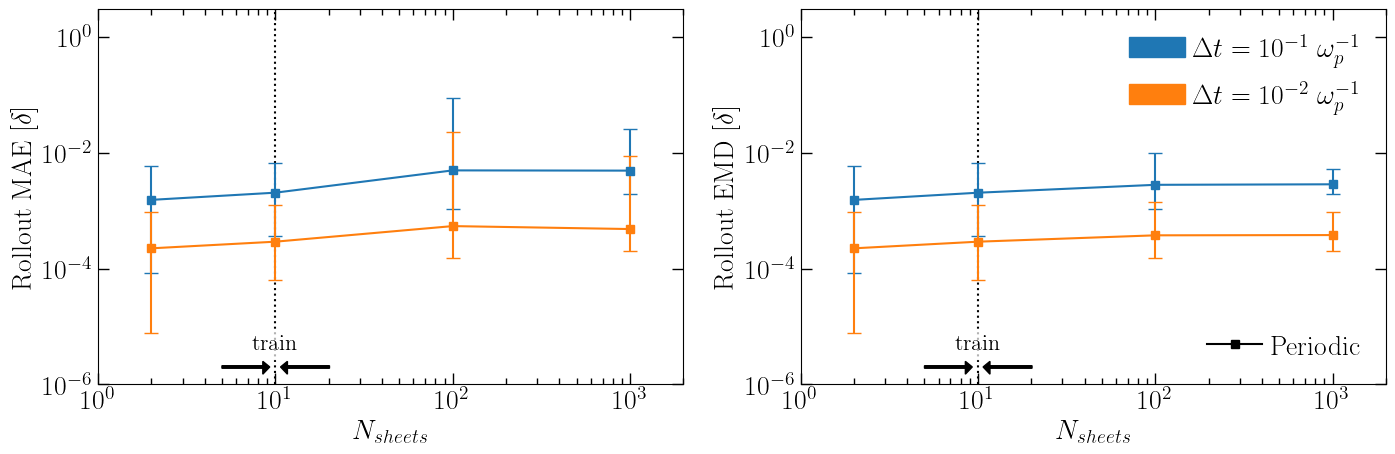

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14,5), 
                       gridspec_kw={'top': 0.9, 'bottom': 0.15, 'left': 0.07, 'right': 0.99})

colors = {1e-1: 'tab:blue', 1e-2: 'tab:orange'}
linestyle = {'reflecting': '--', 'periodic': '-'}
markers = {'reflecting': 'o', 'periodic': 's'}

boundary = 'periodic'

for a in ax:
    a.axvline(10, ls=':', color='k')
    a.arrow(20.2, 2*10**-6., -8.5, 0, width=0.2*10**-6, head_width=10**-6, head_length=1, color='k')
    a.arrow(5, 2*10**-6., 3.5, 0, width=0.2*10**-6, head_width=10**-6, head_length=0.8, color='k')
    a.text(7.4, 4*10**-6, 'train', fontsize=16, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))
    
for dt, rt in results.items():
    
    e_x, e_xmin, e_xmax = [], [], []
    e_w, e_wmin, e_wmax = [], [], []
    
    for seed, rs in rt.items():
        rb = rs[boundary]
        e_x.append([rb[n]['e_x']['mean'] for n in N_SHEETS])
        e_xmin.append([rb[n]['e_x']['min'] for n in N_SHEETS])
        e_xmax.append([rb[n]['e_x']['max'] for n in N_SHEETS])

        e_w.append([rb[n]['e_w']['mean'] for n in N_SHEETS])
        e_wmin.append([rb[n]['e_w']['min'] for n in N_SHEETS])
        e_wmax.append([rb[n]['e_w']['max'] for n in N_SHEETS])
    
    
    ax[0].errorbar(N_SHEETS, 
                   np.mean(e_x, axis=0),
                   yerr=[np.mean(e_x, axis=0) - np.min(e_xmin, axis=0), 
                         np.max(e_xmax, axis=0)  - np.mean(e_x, axis=0)],
                   capsize=5, ls=linestyle[boundary], color=colors[dt],
                   marker=markers[boundary])

    ax[1].errorbar(N_SHEETS, 
                   np.mean(e_w, axis=0),
                   yerr=[np.mean(e_w, axis=0) - np.min(e_wmin, axis=0), 
                         np.max(e_wmax, axis=0)  - np.mean(e_w, axis=0)],
                   capsize=5, ls=linestyle[boundary], color=colors[dt],
                   marker=markers[boundary])


for a in ax:
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_ylim(1e-6, 3e0)
    a.set_xlim(1, 2e3)
    a.set_xlabel('$N_{sheets}$')

ax[0].set_ylabel('Rollout MAE [$\delta$]')
ax[1].set_ylabel('Rollout EMD [$\delta$]')

handles1 = []
handles2 = []
for b in [boundary]:
    handles1.append(mlines.Line2D([], [], color='k', linestyle=linestyle[b], marker=markers[b], label=b.capitalize()))
for dt, c in colors.items():
    handles2.append(mpatches.Patch(color=c, label='$\Delta t = 10^{{{:.0f}}}\ \omega_p^{{-1}}$'.format(np.log10(dt))))

l1 = ax[1].legend(handles=handles2, loc='upper right', fontsize=20)    
l2 = ax[1].legend(handles=handles1, loc='lower right', fontsize=20)
ax[1].add_artist(l1)
    
plt.savefig(f'../img/benchmark_rollout_{boundary}.pdf')
plt.show()

### Both boundaries

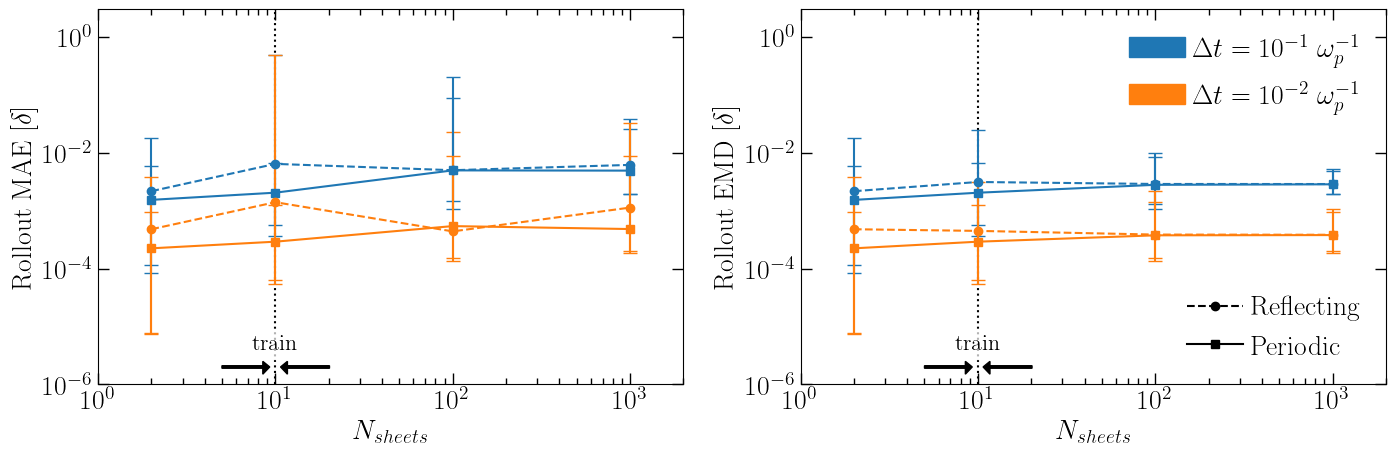

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14,5), 
                       gridspec_kw={'top': 0.9, 'bottom': 0.15, 'left': 0.07, 'right': 0.99})

colors = {1e-1: 'tab:blue', 1e-2: 'tab:orange'}
linestyle = {'reflecting': '--', 'periodic': '-'}
markers = {'reflecting': 'o', 'periodic': 's'}

for a in ax:
    a.axvline(10, ls=':', color='k')
    a.arrow(20.2, 2*10**-6., -8.5, 0, width=0.2*10**-6, head_width=10**-6, head_length=1, color='k')
    a.arrow(5, 2*10**-6., 3.5, 0, width=0.2*10**-6, head_width=10**-6, head_length=0.8, color='k')
    a.text(7.4, 4*10**-6, 'train', fontsize=16, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))
    
for boundary in ['periodic', 'reflecting']:
    for dt, rt in results.items():

        e_x, e_xmin, e_xmax = [], [], []
        e_w, e_wmin, e_wmax = [], [], []

        for seed, rs in rt.items():
            rb = rs[boundary]
            e_x.append([rb[n]['e_x']['mean'] for n in N_SHEETS])
            e_xmin.append([rb[n]['e_x']['min'] for n in N_SHEETS])
            e_xmax.append([rb[n]['e_x']['max'] for n in N_SHEETS])

            e_w.append([rb[n]['e_w']['mean'] for n in N_SHEETS])
            e_wmin.append([rb[n]['e_w']['min'] for n in N_SHEETS])
            e_wmax.append([rb[n]['e_w']['max'] for n in N_SHEETS])


        ax[0].errorbar(N_SHEETS, 
                       np.mean(e_x, axis=0),
                       yerr=[np.mean(e_x, axis=0) - np.min(e_xmin, axis=0), 
                             np.max(e_xmax, axis=0)  - np.mean(e_x, axis=0)],
                       capsize=5, ls=linestyle[boundary], color=colors[dt],
                       marker=markers[boundary])

        ax[1].errorbar(N_SHEETS, 
                       np.mean(e_w, axis=0),
                       yerr=[np.mean(e_w, axis=0) - np.min(e_wmin, axis=0), 
                             np.max(e_wmax, axis=0)  - np.mean(e_w, axis=0)],
                       capsize=5, ls=linestyle[boundary], color=colors[dt],
                       marker=markers[boundary])


for a in ax:
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_ylim(1e-6, 3e0)
    a.set_xlim(1, 2e3)
    a.set_xlabel('$N_{sheets}$')

ax[0].set_ylabel('Rollout MAE [$\delta$]')
ax[1].set_ylabel('Rollout EMD [$\delta$]')

handles1 = []
handles2 = []
for b in ['reflecting', 'periodic']:
    handles1.append(mlines.Line2D([], [], color='k', linestyle=linestyle[b], marker=markers[b], label=b.capitalize()))
for dt, c in colors.items():
    handles2.append(mpatches.Patch(color=c, label='$\Delta t = 10^{{{:.0f}}}\ \omega_p^{{-1}}$'.format(np.log10(dt))))

l1 = ax[1].legend(handles=handles2, loc='upper right', fontsize=20)    
l2 = ax[1].legend(handles=handles1, loc='lower right', fontsize=20)
ax[1].add_artist(l1)

plt.savefig('../img/benchmark_rollout.pdf')
plt.show()

### Comparison between seeds

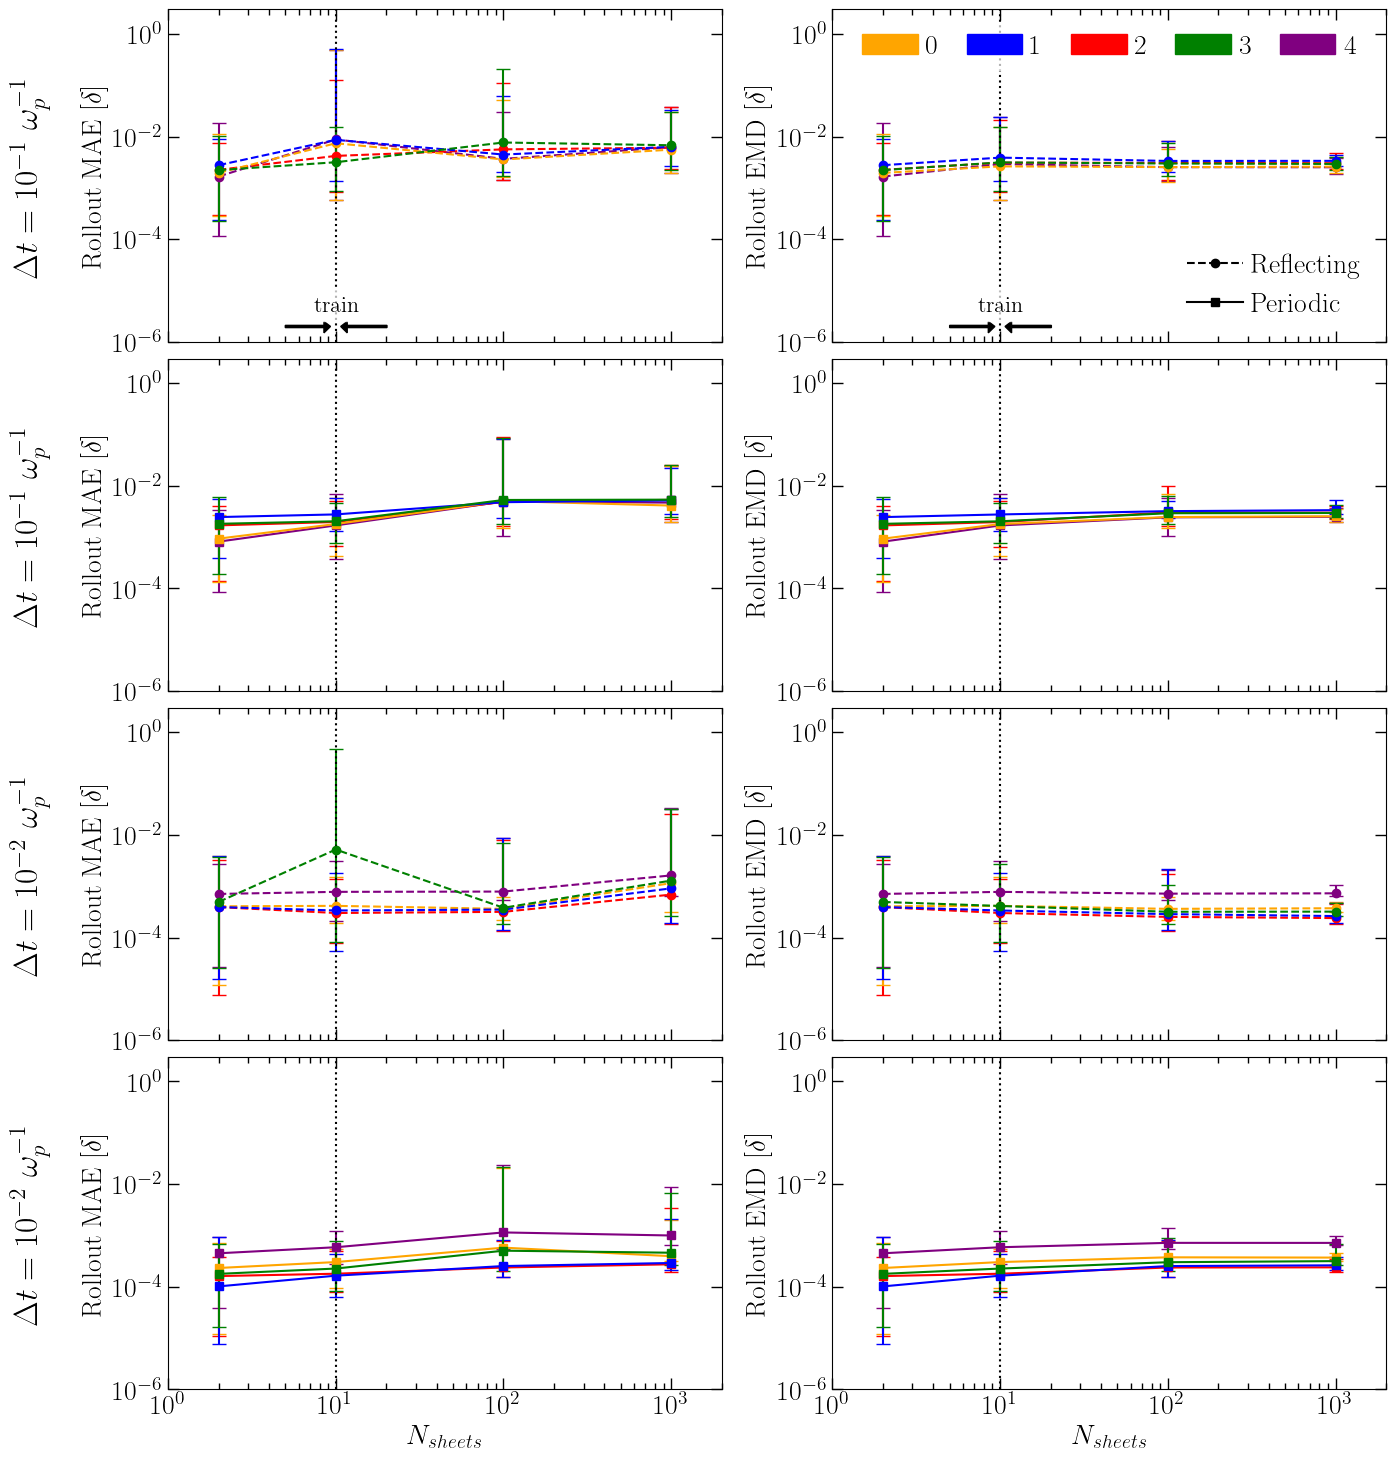

In [12]:
scolors = {'0': 'orange',
               '1': 'blue',
               '2': 'red',
               '3': 'green',
               '4': 'purple'}

fig, ax = plt.subplots(4, 2, figsize=(14,15),
                       sharex=True,
                       gridspec_kw={'top': 0.97, 'bottom': 0.05, 'left': 0.12, 'right': 0.99,
                                    'hspace': 0.05})

i = 0

for dt, rt in results.items():
    for ib, boundary in enumerate(['reflecting', 'periodic']):
        
        e_x, e_xmin, e_xmax = [], [], []
        e_w, e_wmin, e_wmax = [], [], []

        for seed, rs in rt.items():
            rb = rs[boundary]
            e_x = np.array([rb[n]['e_x']['mean'] for n in N_SHEETS])
            e_xmin = np.array([rb[n]['e_x']['min'] for n in N_SHEETS])
            e_xmax = np.array([rb[n]['e_x']['max'] for n in N_SHEETS])

            e_w = np.array([rb[n]['e_w']['mean'] for n in N_SHEETS])
            e_wmin = np.array([rb[n]['e_w']['min'] for n in N_SHEETS])
            e_wmax = np.array([rb[n]['e_w']['max'] for n in N_SHEETS])


            ax[i][0].errorbar(N_SHEETS, 
                              e_x,
                              yerr=[e_x - e_xmin, 
                                     e_xmax  - e_x],
                               capsize=5, ls=linestyle[boundary], color=scolors[seed],
                               marker=markers[boundary])

            ax[i][1].errorbar(N_SHEETS, 
                               e_w,
                               yerr=[e_w - e_wmin, 
                                     e_wmax  - e_w],
                               capsize=5, ls=linestyle[boundary], color=scolors[seed],
                               marker=markers[boundary])
    
        i += 1

for a in ax.ravel():
    a.axvline(10, ls=':', color='k')

for a in ax[0]:
    a.arrow(20.2, 2*10**-6., -8.5, 0, width=0.2*10**-6, head_width=10**-6, head_length=1, color='k')
    a.arrow(5, 2*10**-6., 3.5, 0, width=0.2*10**-6, head_width=10**-6, head_length=0.8, color='k')
    a.text(7.4, 4*10**-6, 'train', fontsize=16, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))

plt.setp(ax, yscale='log')
plt.setp(ax, xscale='log')
plt.setp(ax, xlim=(1, 2e3))
plt.setp(ax, ylim=(1e-6, 3e0))
plt.setp(ax[-1], xlabel = '$N_{sheets}$')

plt.setp(ax[:, 0], ylabel = 'Rollout MAE [$\delta$]')
plt.setp(ax[:, 1], ylabel = 'Rollout EMD [$\delta$]')

handles1 = []
handles2 = []
for b in markers:
    handles1.append(mlines.Line2D([], [], color='k', linestyle=linestyle[b], marker=markers[b], label=b.capitalize()))
for seed, c in scolors.items():
    handles2.append(mpatches.Patch(color=c, label=seed))

l1 = ax[0,1].legend(handles=handles2, loc='upper center', ncol=5, columnspacing=1, fontsize=20)    
l2 = ax[0,1].legend(handles=handles1, loc='lower right', fontsize=20)
ax[0,1].add_artist(l1)


for a, j in zip(ax[:,0], [1,1,2,2]):
    a.text(0.15, 0.08, f'$\Delta t = 10^{{{-j}}} \ \omega_p^{{-1}}$',
           rotation=90,
           horizontalalignment='center',
           verticalalignment='center_baseline',
           multialignment='center',
           fontsize=24,
           fontweight='bold')

plt.savefig(f'../img/benchmark_rollout_all_seeds.pdf')
plt.show()

# Plot Worst Rollouts

## Worst EMD

In [13]:
n_sheets = 10
worse_emd = dict()

for dt, rt in results.items():
    worse_emd[dt] = dict()
    print(dt)
    
    for boundary in ['reflecting', 'periodic']:
        print(boundary)
        emd_max = []
        seeds = []
        for seed, rs in rt.items():
            emd_max.append(rs[boundary][n_sheets]['e_w']['max'])
            seeds.append(seed)
            print(emd_max[-1], seeds[-1])
        
        worse_emd[dt][boundary] = seeds[np.argmax(emd_max)]
        print()
        
    print()

0.1
reflecting
0.023991306703606892 4
0.021366738905091602 2
0.01536114223942572 0
0.024308620255653154 1
0.01506415915858069 3

periodic
0.006748862045611718 4
0.005052386691833113 2
0.005887922202844594 0
0.005810185608172582 1
0.004617383763158896 3


0.01
reflecting
0.003081655170772015 4
0.0013829763183265437 2
0.0015050851569969052 0
0.0018316935393742045 1
0.0027506256008819484 3

periodic
0.0012353621252585763 4
0.0004898556114077702 2
0.0005502847346572398 0
0.00043090040133863763 1
0.0007732336963443068 3




dt: 0.1
Boundary: periodic
#Simulation: 43
EMD: 0.006748862045611718


  0%|          | 0/99 [00:00<?, ?it/s]

Rollout MAE: 0.0007 [L], 0.0068 [dx_eq]
Rollout EMD: 0.0007 [L], 0.0067 [dx_eq]


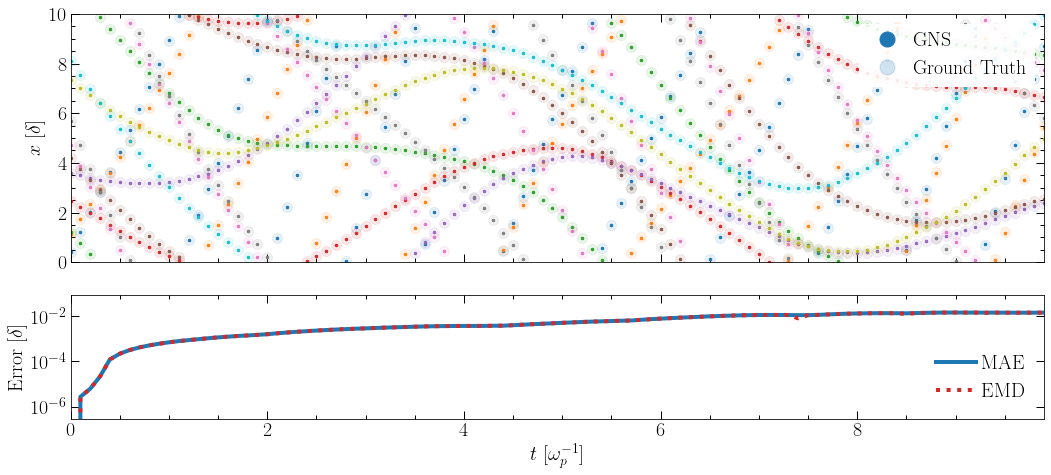

dt: 0.1
Boundary: reflecting
#Simulation: 59
EMD: 0.024308620255653154


  0%|          | 0/99 [00:00<?, ?it/s]

Rollout MAE: 0.0498 [L], 0.4975 [dx_eq]
Rollout EMD: 0.0024 [L], 0.0243 [dx_eq]


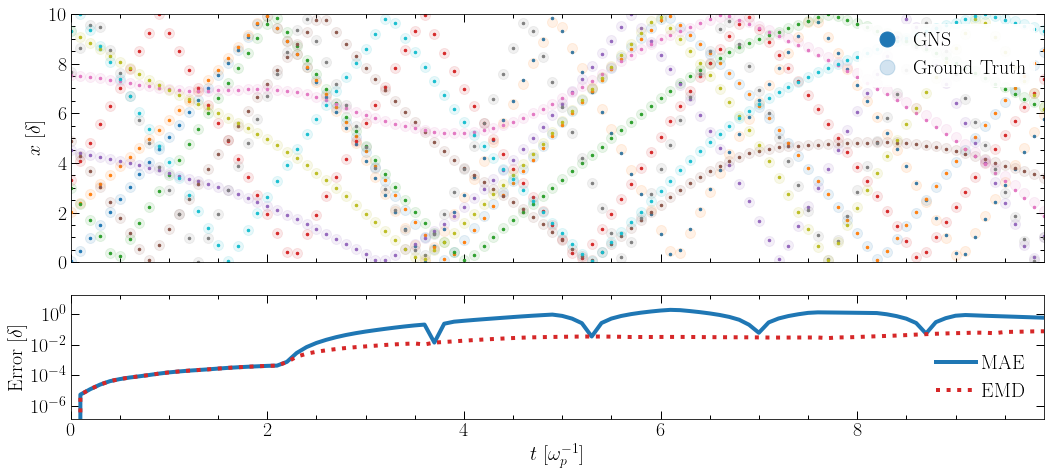

dt: 0.01
Boundary: periodic
#Simulation: 4
EMD: 0.0012353621252585763


  0%|          | 0/999 [00:00<?, ?it/s]

n_guards != 0 ignored for periodic boundaries
Rollout MAE: 0.0001 [L], 0.0012 [dx_eq]
Rollout EMD: 0.0001 [L], 0.0012 [dx_eq]


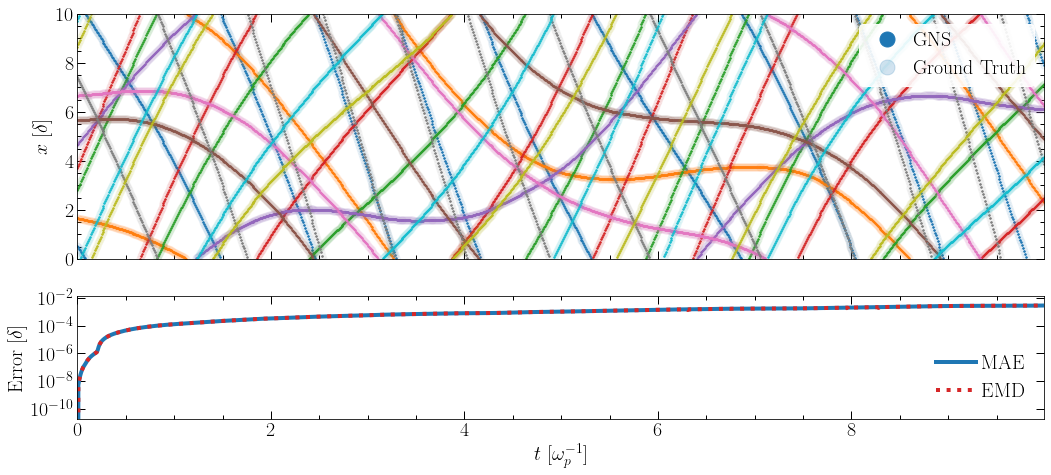

dt: 0.01
Boundary: reflecting
#Simulation: 59
EMD: 0.003081655170772015


  0%|          | 0/999 [00:00<?, ?it/s]

Rollout MAE: 0.0003 [L], 0.0031 [dx_eq]
Rollout EMD: 0.0003 [L], 0.0031 [dx_eq]


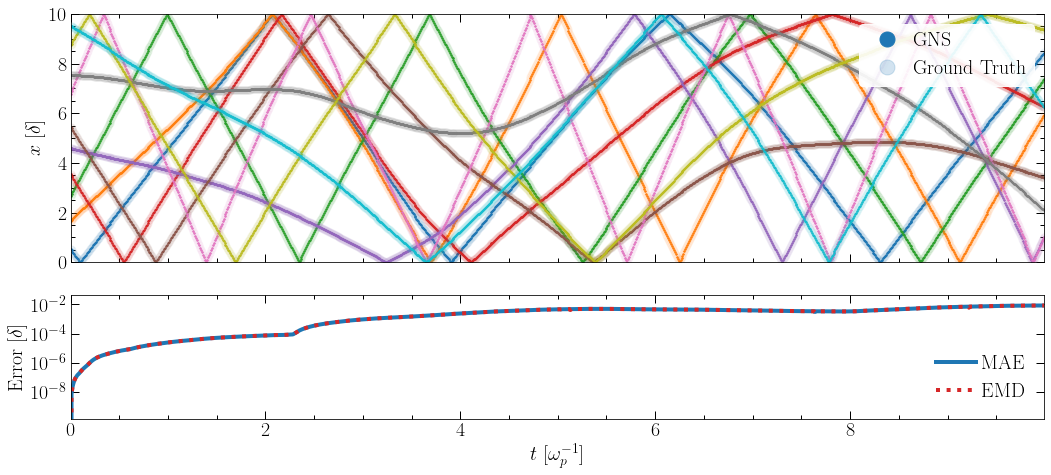

In [15]:
n_sheets = 10
ms_pred = {1e-1:5, 1e-2:3}
ms_true = {1e-1:20, 1e-2:15}

for dt, rt in results.items():
    for boundary in ['periodic', 'reflecting']:
        
        seed = worse_emd[dt][boundary]
        rb = rt[seed][boundary]
        
        model_folder = Path('../../models/final/dt{0:.0e}'.format(dt).replace('e-0', 'e-') + f'/{seed}')
        sim = SMGNS(model_folder, boundary, False)
        
        print('dt:', dt)
        print('Boundary:', boundary)
        print('#Simulation:', rb[n_sheets]['e_w']['argmax'])
        print('EMD:', rb[n_sheets]['e_w']['max'])
        
        # load test data
        folder = f'../../data/dataset/test/{n_sheets}/{boundary}'

        with open(Path(folder) / 'info.yml', 'r') as f:
            info = yaml.safe_load(f)
            dt_simulator = info['dt'] * info['dt_undersample']

        dt_undersample = int(sim.dt_train / dt_simulator)

        I = rb[n_sheets]['e_w']['argmax']
        X = jnp.load(folder + f'/x_{I:04d}.npy')
        V = jnp.load(folder + f'/v_{I:04d}.npy')
        X_eq = jnp.load(folder + f'/x_eq_{I:04d}.npy')

        X = X[::dt_undersample]
        V = V[::dt_undersample]
        X_eq = X_eq[::dt_undersample]

        i_sorted = jnp.argsort(X[1], axis=-1)
        i_sorted = i_sorted[jnp.newaxis]

        X = jnp.take_along_axis(X, i_sorted, axis=-1)
        V = jnp.take_along_axis(V, i_sorted, axis=-1)
        X_eq = jnp.take_along_axis(X_eq, i_sorted, axis=-1)


        X0, V0, X_eq0 = init_XV_crossings(X,V,X_eq,
                                          dt=sim.dt_train, 
                                          boundary=sim.boundary,
                                          L=1)


        X_pred, V_pred, _, _ = sim.pred_rollout(X0,
                                                V0,
                                                X_eq0,
                                                dt=sim.dt_train,
                                                t_max=sim.dt_train*(len(X) - 2),
                                                verbose=True,
                                                n_guards=min(5, X0.shape[-1]),
                                                track_sheets=True,
                                                np_=np)

        plot_trajectory_comparison(X_pred, X[1:], boundary, sim.dt_train, 
                            save_file=f'../img/ex_rollout_dt{dt:.0e}_{boundary}.pdf',
                            rasterized=True, ms_pred=ms_pred[dt], ms_true=ms_true[dt],
                            normalize_dx_eq=True)
        

## Worst MAE

In [16]:
n_sheets = 10
worse_mae = dict()

for dt, rt in results.items():
    worse_mae[dt] = dict()
    print(dt)
    
    for boundary in ['reflecting', 'periodic']:
        print(boundary)
        mae_max = []
        seeds = []
        for seed, rs in rt.items():
            mae_max.append(rs[boundary][n_sheets]['e_x']['max'])
            seeds.append(seed)
            print(mae_max[-1], seeds[-1])
        
        worse_mae[dt][boundary] = seeds[np.argmax(mae_max)]
        print()
        
    print()

0.1
reflecting
0.48686131857623094 4
0.12652355223422115 2
0.4820675202684569 0
0.4975184029100319 1
0.0151319665618592 3

periodic
0.006791813294893517 4
0.005053705408722118 2
0.005890062026524283 0
0.005823614333988616 1
0.004617383763158896 3


0.01
reflecting
0.003084445366320323 4
0.001383428796280277 2
0.0015057713912174546 0
0.001834250572910832 1
0.4795652350604751 3

periodic
0.001236586092228079 4
0.0004898556114077701 2
0.0005503081397459901 0
0.0004311852390587183 1
0.0007734804346899798 3




dt: 0.1
Boundary: periodic
#Simulation: 43
MAE: 0.006791813294893517


  0%|          | 0/99 [00:00<?, ?it/s]

Rollout MAE: 0.0007 [L], 0.0068 [dx_eq]
Rollout EMD: 0.0007 [L], 0.0067 [dx_eq]


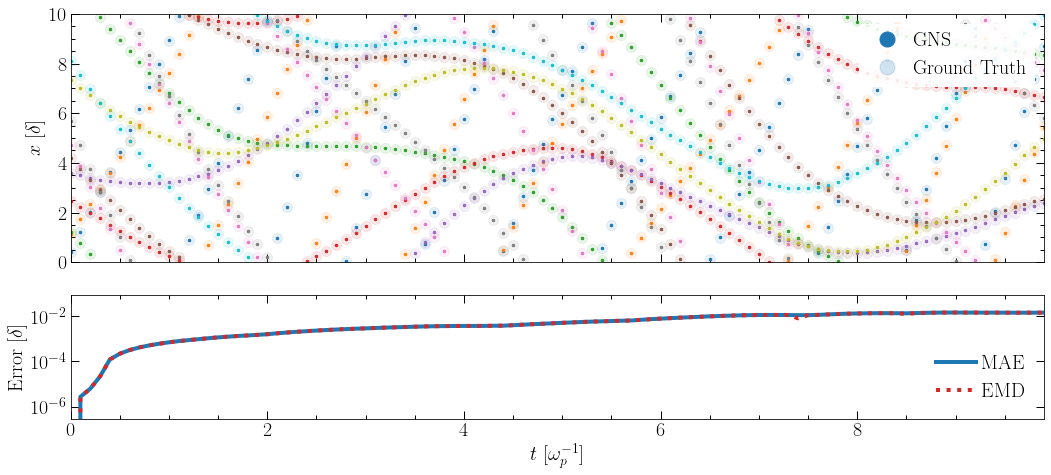

dt: 0.1
Boundary: reflecting
#Simulation: 59
MAE: 0.4975184029100319


  0%|          | 0/99 [00:00<?, ?it/s]

Rollout MAE: 0.0498 [L], 0.4975 [dx_eq]
Rollout EMD: 0.0024 [L], 0.0243 [dx_eq]


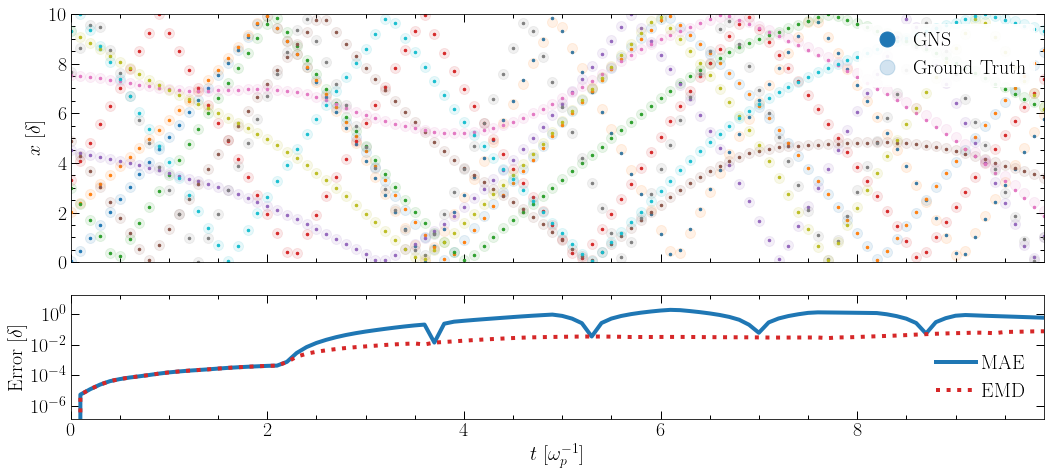

dt: 0.01
Boundary: periodic
#Simulation: 4
MAE: 0.001236586092228079


  0%|          | 0/999 [00:00<?, ?it/s]

Rollout MAE: 0.0001 [L], 0.0012 [dx_eq]
Rollout EMD: 0.0001 [L], 0.0012 [dx_eq]


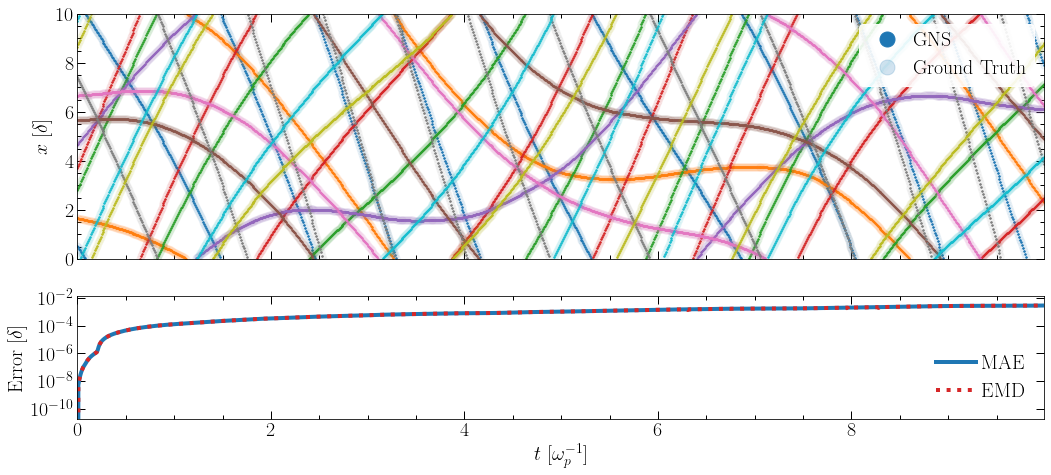

dt: 0.01
Boundary: reflecting
#Simulation: 59
MAE: 0.4795652350604751


  0%|          | 0/999 [00:00<?, ?it/s]

Rollout MAE: 0.0480 [L], 0.4796 [dx_eq]
Rollout EMD: 0.0003 [L], 0.0028 [dx_eq]


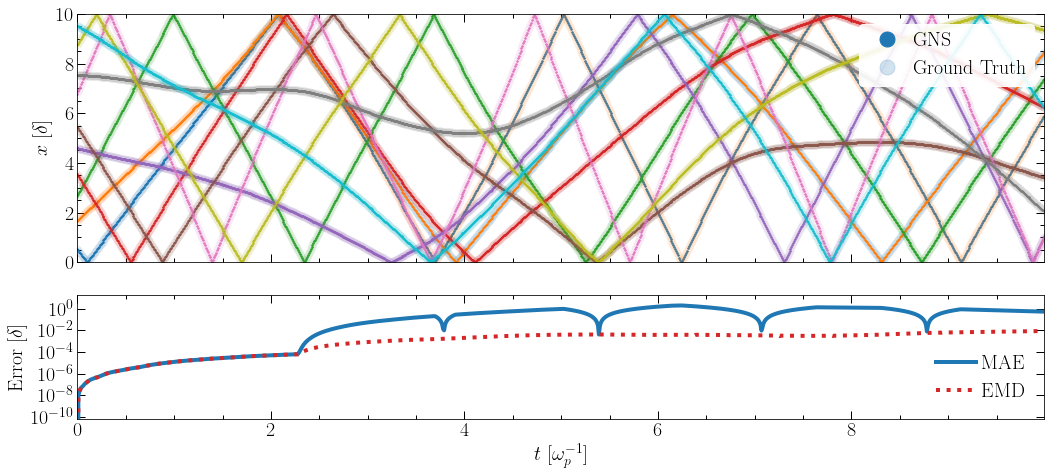

In [18]:
n_sheets = 10
ms_pred = {1e-1:5, 1e-2:3}
ms_true = {1e-1:20, 1e-2:15}

for dt, rt in results.items():
    for boundary in ['periodic', 'reflecting']:
        
        seed = worse_mae[dt][boundary]
        rb = rt[seed][boundary]
        
        model_folder = Path('../../models/final/dt{0:.0e}'.format(dt).replace('e-0', 'e-') + f'/{seed}')
        sim = SMGNS(model_folder, boundary, False)
        
        print('dt:', dt)
        print('Boundary:', boundary)
        print('#Simulation:', rb[n_sheets]['e_x']['argmax'])
        print('MAE:', rb[n_sheets]['e_x']['max'])
        
        # load test data
        folder = f'../../data/dataset/test/{n_sheets}/{boundary}'

        with open(Path(folder) / 'info.yml', 'r') as f:
            info = yaml.safe_load(f)
            dt_simulator = info['dt'] * info['dt_undersample']

        dt_undersample = int(sim.dt_train / dt_simulator)

        I = rb[n_sheets]['e_x']['argmax']
        X = jnp.load(folder + f'/x_{I:04d}.npy')
        V = jnp.load(folder + f'/v_{I:04d}.npy')
        X_eq = jnp.load(folder + f'/x_eq_{I:04d}.npy')

        X = X[::dt_undersample]
        V = V[::dt_undersample]
        X_eq = X_eq[::dt_undersample]

        i_sorted = jnp.argsort(X[1], axis=-1)
        i_sorted = i_sorted[jnp.newaxis]

        X = jnp.take_along_axis(X, i_sorted, axis=-1)
        V = jnp.take_along_axis(V, i_sorted, axis=-1)
        X_eq = jnp.take_along_axis(X_eq, i_sorted, axis=-1)


        X0, V0, X_eq0 = init_XV_crossings(X,V,X_eq,
                                          dt=sim.dt_train, 
                                          boundary=sim.boundary,
                                          L=1)


        X_pred, V_pred, _, _ = sim.pred_rollout(X0,
                                                V0,
                                                X_eq0,
                                                dt=sim.dt_train,
                                                t_max=sim.dt_train*(len(X) - 2),
                                                verbose=True,
                                                n_guards=min(5, X0.shape[-1]),
                                                track_sheets=True,
                                                np_=np)

        plot_trajectory_comparison(X_pred, X[1:], boundary, sim.dt_train, 
                            save_file=f'../img/ex_rollout_mae_dt{dt:.0e}_{boundary}.pdf',
                            rasterized=True, ms_pred=ms_pred[dt], ms_true=ms_true[dt],
                            normalize_dx_eq=True)
        

## Single simulation of choice

dt: 0.01
Boundary: reflecting
#Simulation: 59
EMD: 0.0027506256008819484


  0%|          | 0/999 [00:00<?, ?it/s]

Rollout MAE: 0.0000 [L], 0.0001 [dx_eq]
Rollout EMD: 0.0000 [L], 0.0001 [dx_eq]


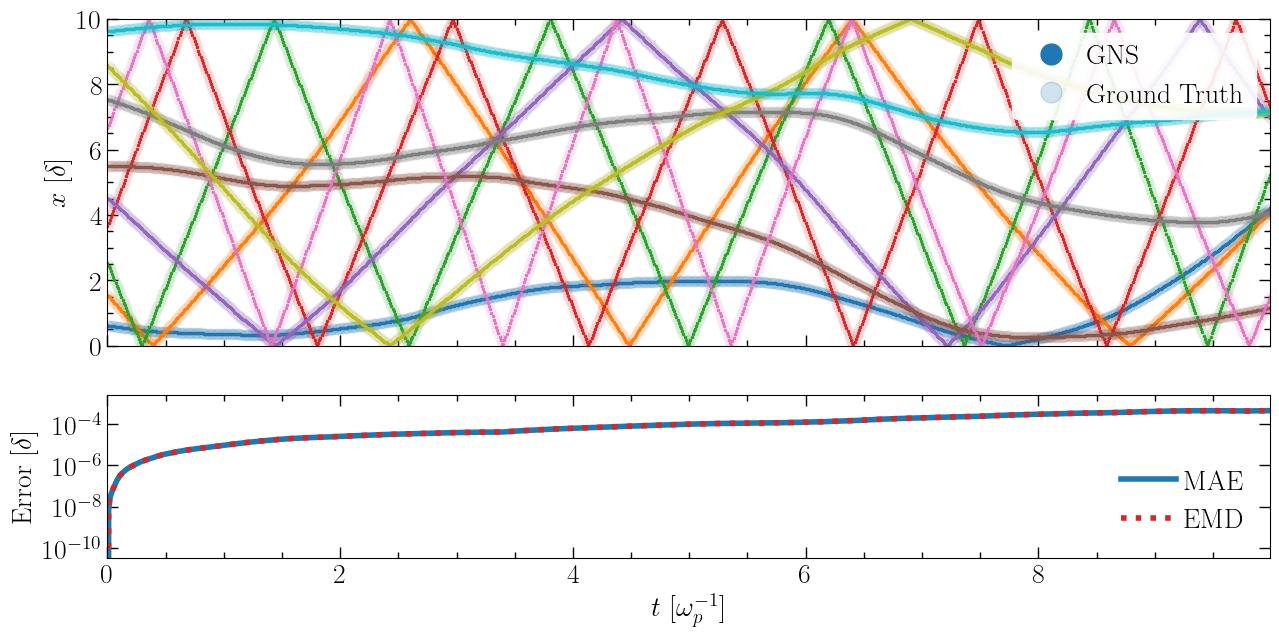

In [19]:
dt = 1e-2
model_folder = Path('../../models/final/dt{0:.0e}/1'.format(dt).replace('e-0', 'e-'))
sim = SMGNS(model_folder, boundary, False)

n_sheets = 10
print('dt:', dt)
print('Boundary:', boundary)
print('#Simulation:', rb[n_sheets]['e_w']['argmax'])
print('EMD:', rb[n_sheets]['e_w']['max'])

# load test data
folder = f'../../data/dataset/test/{n_sheets}/{boundary}'

with open(Path(folder) / 'info.yml', 'r') as f:
    info = yaml.safe_load(f)
    dt_simulator = info['dt'] * info['dt_undersample']

dt_undersample = int(sim.dt_train / dt_simulator)

I = 4 # simulation index
X = jnp.load(folder + f'/x_{I:04d}.npy')
V = jnp.load(folder + f'/v_{I:04d}.npy')
X_eq = jnp.load(folder + f'/x_eq_{I:04d}.npy')

X = X[::dt_undersample]
V = V[::dt_undersample]
X_eq = X_eq[::dt_undersample]

i_sorted = jnp.argsort(X[1], axis=-1)
i_sorted = i_sorted[jnp.newaxis]

X = jnp.take_along_axis(X, i_sorted, axis=-1)
V = jnp.take_along_axis(V, i_sorted, axis=-1)
X_eq = jnp.take_along_axis(X_eq, i_sorted, axis=-1)


X0, V0, X_eq0 = init_XV_crossings(X,V,X_eq,
                                  dt=sim.dt_train, 
                                  boundary=sim.boundary,
                                  L=1)


X_pred, V_pred, _, _ = sim.pred_rollout(X0,
                                        V0,
                                        X_eq0,
                                        t_max=(len(X) - 2)*sim.dt_train,
                                        verbose=True,
                                        n_guards=min(4, X0.shape[-1]),
                                        track_sheets=True,
                                        np_=np)

plot_trajectory_comparison(X_pred, X[1:],boundary, sim.dt_train, normalize_dx_eq=True)#, 
                    #save_fig=f'../img/ex_rollout_dt{dt:.0e}_{boundary}.pdf',
                    # rasterized=True, ms_pred=ms_pred[dt], ms_true=ms_true[dt])

